<a href="https://colab.research.google.com/github/ziedjouini/new_projet/blob/main/Automobile_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('Train_Dataset.csv')
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_29436\608555978.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Train_Dataset.csv')


ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0      61190.55      3416.85            Alone         Commercial   
1          0.0         15282      1826.55            Alone            Service   
2          1.0      59527.35       2788.2            Alone            Service   
3          0.0       53870.4      2295.45            Alone            Retired   
4          2.0      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative Age_Days Employed_Days  \
0                Home                   0.028663    13957          1062   
1                Home                   0.008575    14162          4129   
2              Family                     0.0228    16790          5102   
3                Home                   0.010556    23195        365243   
4                Home                   0.020713    11366          2977   

  Registration_Days ID_Days  Own_House_Age  Mobile_Tag  Homephone_Tag  \
0              6123     383            NaN           1              1   
1              7833      21            0.0           1              0   
2               NaN     331            NaN           1              0   
3               NaN     775            NaN           1              0   
4              5516    4043            6.0           1              0   

   Workphone_Working Client_Occupation  Client_Family_Members  \
0                  0             Sales                    2.0   
1                  1               NaN                    2.0   
2                  0     Realty agents                    2.0   
3                  0               NaN                    2.0   
4                  0          Laborers                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                       NaN   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                       NaN   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     XNA   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_1  Score_Source_2 Score_Source_3  Social_Circle_Default  \
0        0.568066        0.478787            NaN                 0.0186   
1        0.563360        0.215068            NaN                    NaN   
2             NaN        0.552795       0.329655                 0.0742   
3             NaN        0.135182       0.631355                 

# Data Preprocessing Part 1

In [ ]:
# Drop identifier column
df.drop(columns = ['ID', 'ID_Days'], inplace=True)
df.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0          6750        0.0         0.0          1.0        0.0          0.0   
1         20250        1.0         0.0          1.0        NaN          0.0   
2         18000        0.0         0.0          1.0        0.0          1.0   
3         15750        0.0         0.0          1.0        1.0          0.0   
4         33750        1.0         0.0          1.0        0.0          2.0   

  Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0      61190.55      3416.85            Alone         Commercial   
1         15282      1826.55            Alone            Service   
2      59527.35       2788.2            Alone            Service   
3       53870.4      2295.45            Alone            Retired   
4      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative Age_Days Employed_Days  \
0                Home                   0.028663    13957          1062   
1                Home                   0.008575    14162          4129   
2              Family                     0.0228    16790          5102   
3                Home                   0.010556    23195        365243   
4                Home                   0.020713    11366          2977   

  Registration_Days  Own_House_Age  Mobile_Tag  Homephone_Tag  \
0              6123            NaN           1              1   
1              7833            0.0           1              0   
2               NaN            NaN           1              0   
3               NaN            NaN           1              0   
4              5516            6.0           1              0   

   Workphone_Working Client_Occupation  Client_Family_Members  \
0                  0             Sales                    2.0   
1                  1               NaN                    2.0   
2                  0     Realty agents                    2.0   
3                  0               NaN                    2.0   
4                  0          Laborers                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                       NaN   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                       NaN   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     XNA   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_1  Score_Source_2 Score_Source_3  Social_Circle_Default  \
0        0.568066        0.478787            NaN                 0.0186   
1        0.563360        0.215068            NaN                    NaN   
2             NaN        0.552795       0.329655                 0.0742   
3             NaN        0.135182       0.631355                    NaN   
4        0.508199        0.301182       0.355639                 0.2021   

   Phone_Change

In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Client_Income                  1516
Credit_Amount                  6816
Loan_Annuity                  16680
Accompany_Client                  7
Client_Income_Type                8
Client_Education                  5
Client_Marital_Status             4
Client_Gender                     3
Loan_Contract_Type                2
Client_Housing_Type               6
Population_Region_Relative      164
Age_Days                      22583
Employed_Days                 13220
Registration_Days             19254
Client_Occupation                18
Client_Permanent_Match_Tag        2
Client_Contact_Work_Tag           2
Type_Organization                58
Score_Source_3                 1430
dtype: int64

In [ ]:
#Change numerical column datatypes from object to int and remove string data
df['Client_Income'] = df['Client_Income'].str.replace('[^0-9.]', '', regex=True)
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')

df['Credit_Amount'] = df['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')

df['Loan_Annuity'] = df['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

df['Population_Region_Relative'] = df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')

df['Age_Days'] = df['Age_Days'].str.replace('[^0-9.]', '', regex=True)
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')

df['Employed_Days'] = df['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')

df['Registration_Days'] = df['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

df['Score_Source_3'] = df['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')

In [ ]:
df.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0         6750.0        0.0         0.0          1.0        0.0          0.0   
1        20250.0        1.0         0.0          1.0        NaN          0.0   
2        18000.0        0.0         0.0          1.0        0.0          1.0   
3        15750.0        0.0         0.0          1.0        1.0          0.0   
4        33750.0        1.0         0.0          1.0        0.0          2.0   

   Credit_Amount  Loan_Annuity Accompany_Client Client_Income_Type  \
0       61190.55       3416.85            Alone         Commercial   
1       15282.00       1826.55            Alone            Service   
2       59527.35       2788.20            Alone            Service   
3       53870.40       2295.45            Alone            Retired   
4      133988.40       3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type  Population_Region_Relative  Age_Days  Employed_Days  \
0                Home                    0.028663   13957.0         1062.0   
1                Home                    0.008575   14162.0         4129.0   
2              Family                    0.022800   16790.0         5102.0   
3                Home                    0.010556   23195.0       365243.0   
4                Home                    0.020713   11366.0         2977.0   

   Registration_Days  Own_House_Age  Mobile_Tag  Homephone_Tag  \
0             6123.0            NaN           1              1   
1             7833.0            0.0           1              0   
2                NaN            NaN           1              0   
3                NaN            NaN           1              0   
4             5516.0            6.0           1              0   

   Workphone_Working Client_Occupation  Client_Family_Members  \
0                  0             Sales                    2.0   
1                  1               NaN                    2.0   
2                  0     Realty agents                    2.0   
3                  0               NaN                    2.0   
4                  0          Laborers                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                       NaN   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                       NaN   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     XNA   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  \
0        0.568066        0.478787             NaN                 0.0186   
1        0.563360        0.215068             NaN                    NaN   
2             NaN        0.552795             NaN                 0.0742   
3             NaN        0.135182             NaN                    NaN   
4        0.508199        0.301182            

In [ ]:
df.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_

In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Accompany_Client               7
Client_Income_Type             8
Client_Education               5
Client_Marital_Status          4
Client_Gender                  3
Loan_Contract_Type             2
Client_Housing_Type            6
Client_Occupation             18
Client_Permanent_Match_Tag     2
Client_Contact_Work_Tag        2
Type_Organization             58
dtype: int64

# Segment Client Occupation into smaller Unique Value

In [ ]:
df.Client_Occupation.unique()

array(['Sales', nan, 'Realty agents', 'Laborers', 'Core', 'Drivers',
       'Managers', 'Accountants', 'High skill tech', 'Cleaning', 'HR',
       'Waiters/barmen', 'Low-skill Laborers', 'Medicine', 'Cooking',
       'Private service', 'Security', 'IT', 'Secretaries'], dtype=object)

In [ ]:
def map_occupation(category):
    if pd.isna(category):
        return 'Unknown'
    elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
        return 'White Collar'
    elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
        return 'Blue Collar'
    elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
        return 'Service'
    elif category == 'Medicine':
        return 'Medical'
    else:
        return 'Other'

# Apply the function to the 'Client_Occupation' column and create a new 'Occupation_Category' column
df['Client_Occupation'] = df['Client_Occupation'].apply(map_occupation)

<AxesSubplot:>

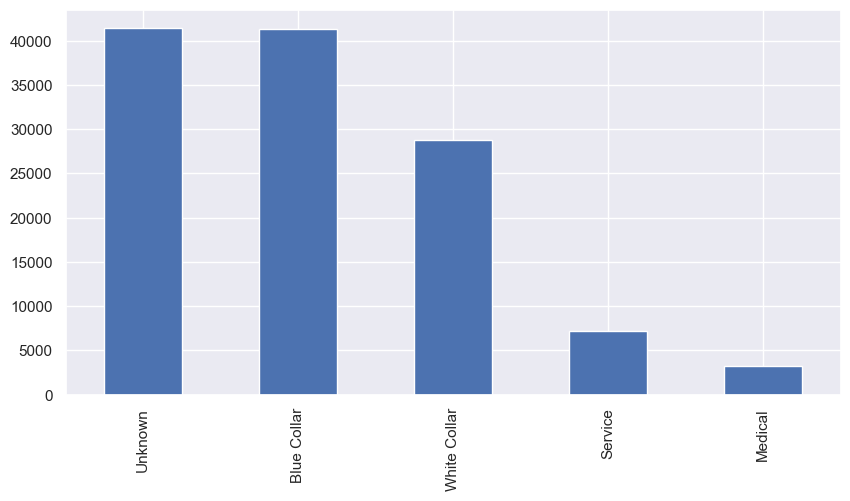

In [ ]:
plt.figure(figsize=(10,5))
df['Client_Occupation'].value_counts().plot(kind='bar')

# Segment Client Occupation into smaller Unique Value

In [ ]:
df.Type_Organization.unique()

array(['Self-employed', 'Government', 'XNA', 'Business Entity Type 3',
       'Other', nan, 'Industry: type 3', 'Business Entity Type 2',
       'Business Entity Type 1', 'Transport: type 4', 'Construction',
       'Kindergarten', 'Trade: type 3', 'Industry: type 2',
       'Trade: type 7', 'Trade: type 2', 'Agriculture', 'Military',
       'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11',
       'Bank', 'School', 'Industry: type 9', 'Postal', 'University',
       'Transport: type 2', 'Restaurant', 'Electricity', 'Police',
       'Industry: type 4', 'Security Ministries', 'Services',
       'Transport: type 3', 'Mobile', 'Hotel', 'Security',
       'Industry: type 7', 'Advertising', 'Cleaning', 'Realtor',
       'Trade: type 6', 'Culture', 'Industry: type 5', 'Telecom',
       'Trade: type 1', 'Industry: type 12', 'Industry: type 8',
       'Insurance', 'Emergency', 'Legal Services', 'Industry: type 10',
       'Trade: type 4', 'Industry: type 6', 'Transport: type 1',
   

In [ ]:
# Define a function to map original values to new categories
def map_organization(category):
    if pd.isna(category):
        return 'Unknown'
    elif category == 'XNA':
        return 'Unknown'  # Replace 'XNA' with 'Unknown'
    elif 'Business Entity Type' in category:
        return 'Business Entity'  # Group all 'Business Entity Type' together
    elif 'Industry: type' in category:
        return 'Industry'  # Group all 'Industry: type' together
    elif 'Trade: type' in category:
        return 'Trade'  # Group all 'Trade: type' together
    elif 'Transport: type' in category:
        return 'Transport'  # Group all 'Transport: type' together
    else:
        return 'Other'

# Apply the function to the 'Type_Organization' column
df['Type_Organization'] = df['Type_Organization'].apply(map_organization)

<AxesSubplot:>

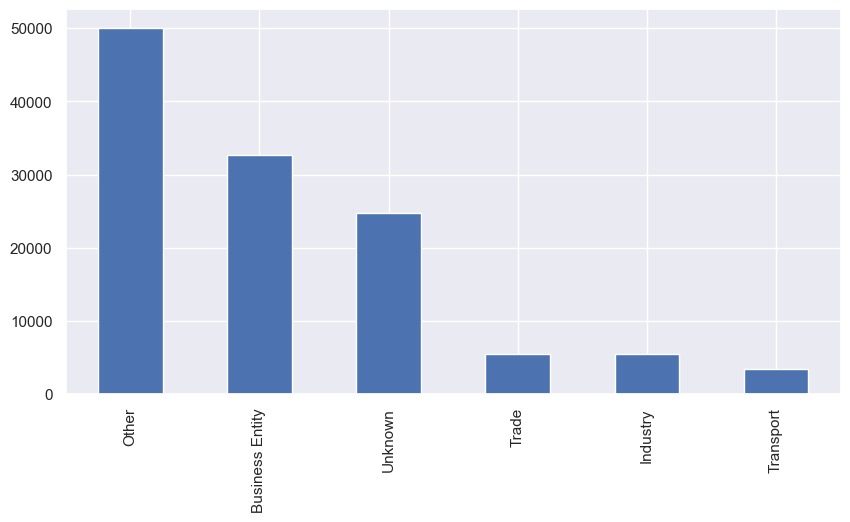

In [ ]:
plt.figure(figsize=(10,5))
df['Type_Organization'].value_counts().plot(kind='bar')

In [ ]:
# Replace 1 with 'yes' and 0 with 'no' in the categorical column
df['Car_Owned'] = df['Car_Owned'].replace({0: 'no', 1: 'yes'})
df['Bike_Owned'] = df['Bike_Owned'].replace({0: 'no', 1: 'yes'})
df['Active_Loan'] = df['Active_Loan'].replace({0: 'no', 1: 'yes'})
df['House_Own'] = df['House_Own'].replace({0: 'no', 1: 'yes'})
df['Mobile_Tag'] = df['Mobile_Tag'].replace({0: 'no', 1: 'yes'})
df['Homephone_Tag'] = df['Homephone_Tag'].replace({0: 'no', 1: 'yes'})
df['Workphone_Working'] = df['Workphone_Working'].replace({0: 'no', 1: 'yes'})
df['Default'] = df['Default'].replace({0: 'no', 1: 'yes'})

In [ ]:
df.head()

Client_Income Car_Owned Bike_Owned Active_Loan House_Own  Child_Count  \
0         6750.0        no         no         yes        no          0.0   
1        20250.0       yes         no         yes       NaN          0.0   
2        18000.0        no         no         yes        no          1.0   
3        15750.0        no         no         yes       yes          0.0   
4        33750.0       yes         no         yes        no          2.0   

   Credit_Amount  Loan_Annuity Accompany_Client Client_Income_Type  \
0       61190.55       3416.85            Alone         Commercial   
1       15282.00       1826.55            Alone            Service   
2       59527.35       2788.20            Alone            Service   
3       53870.40       2295.45            Alone            Retired   
4      133988.40       3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type  Population_Region_Relative  Age_Days  Employed_Days  \
0                Home                    0.028663   13957.0         1062.0   
1                Home                    0.008575   14162.0         4129.0   
2              Family                    0.022800   16790.0         5102.0   
3                Home                    0.010556   23195.0       365243.0   
4                Home                    0.020713   11366.0         2977.0   

   Registration_Days  Own_House_Age Mobile_Tag Homephone_Tag  \
0             6123.0            NaN        yes           yes   
1             7833.0            0.0        yes            no   
2                NaN            NaN        yes            no   
3                NaN            NaN        yes            no   
4             5516.0            6.0        yes            no   

  Workphone_Working Client_Occupation  Client_Family_Members  \
0                no      White Collar                    2.0   
1               yes           Unknown                    2.0   
2                no      White Collar                    2.0   
3                no           Unknown                    2.0   
4                no       Blue Collar                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                       NaN   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                       NaN   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  \
0                        Yes                     Yes             Other   
1                        Yes                     Yes             Other   
2                        Yes                     Yes             Other   
3                        Yes                     Yes           Unknown   
4                        Yes                     Yes   Business Entity   

   Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  \
0        0.568066        0.478787             NaN                 0.0186   
1        0.563360        0.215068             NaN                    NaN   
2             NaN        0.552795             NaN                 0.0742   
3             NaN        0.135182             NaN                    NaN   
4        0.508199        0.301182             NaN                 0.2021   

   Phone_Change  Credit_Bureau Default  
0    

# Exploratory Data Analysis

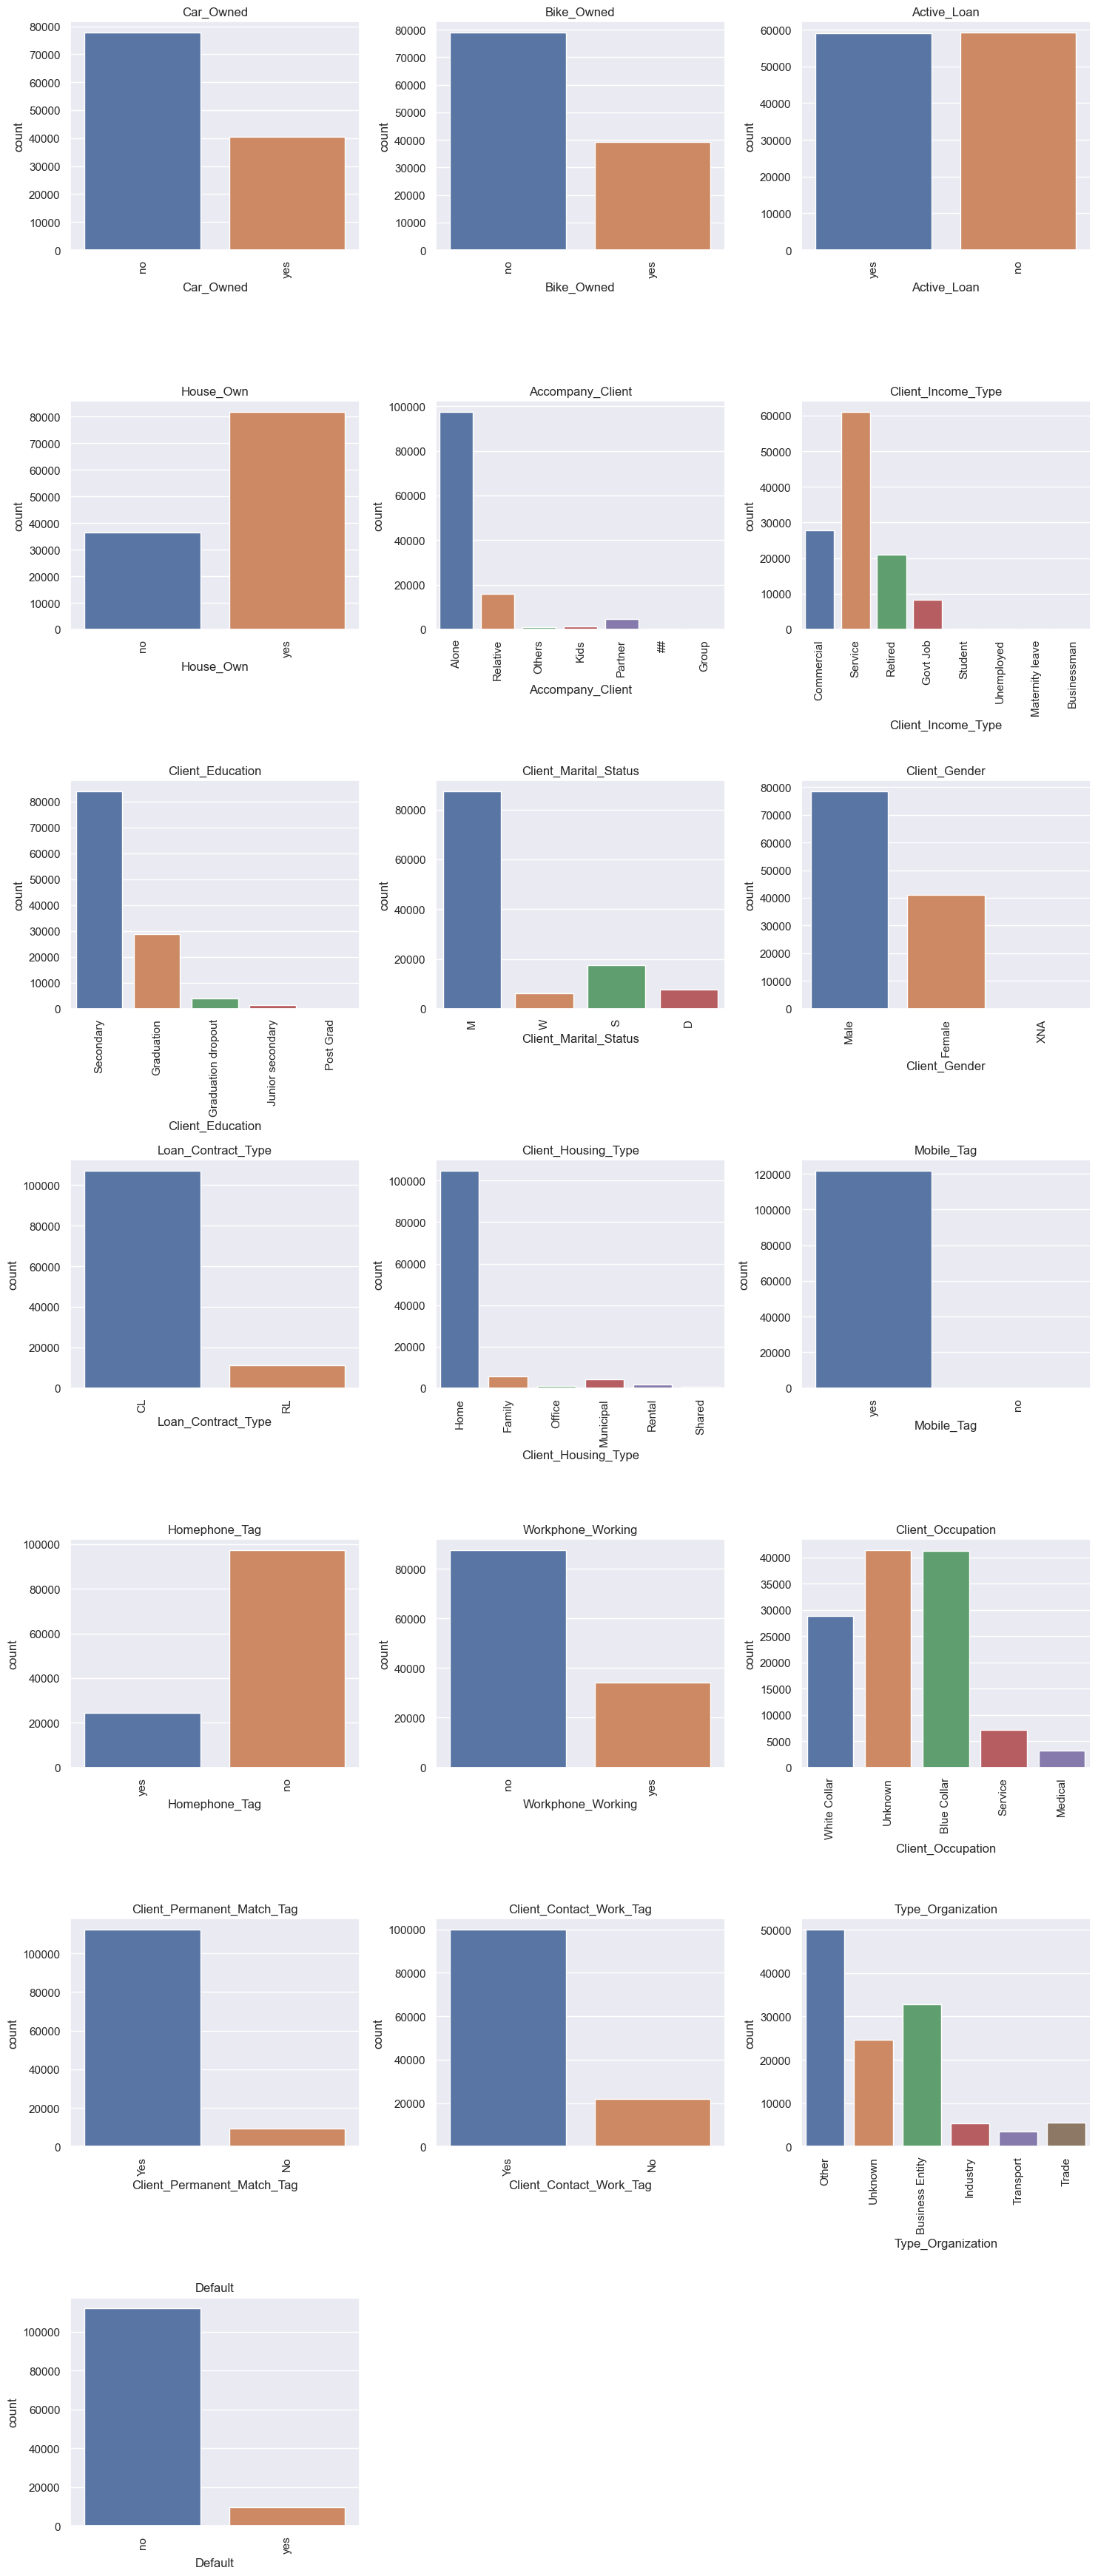

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns) excluding 'Country'
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

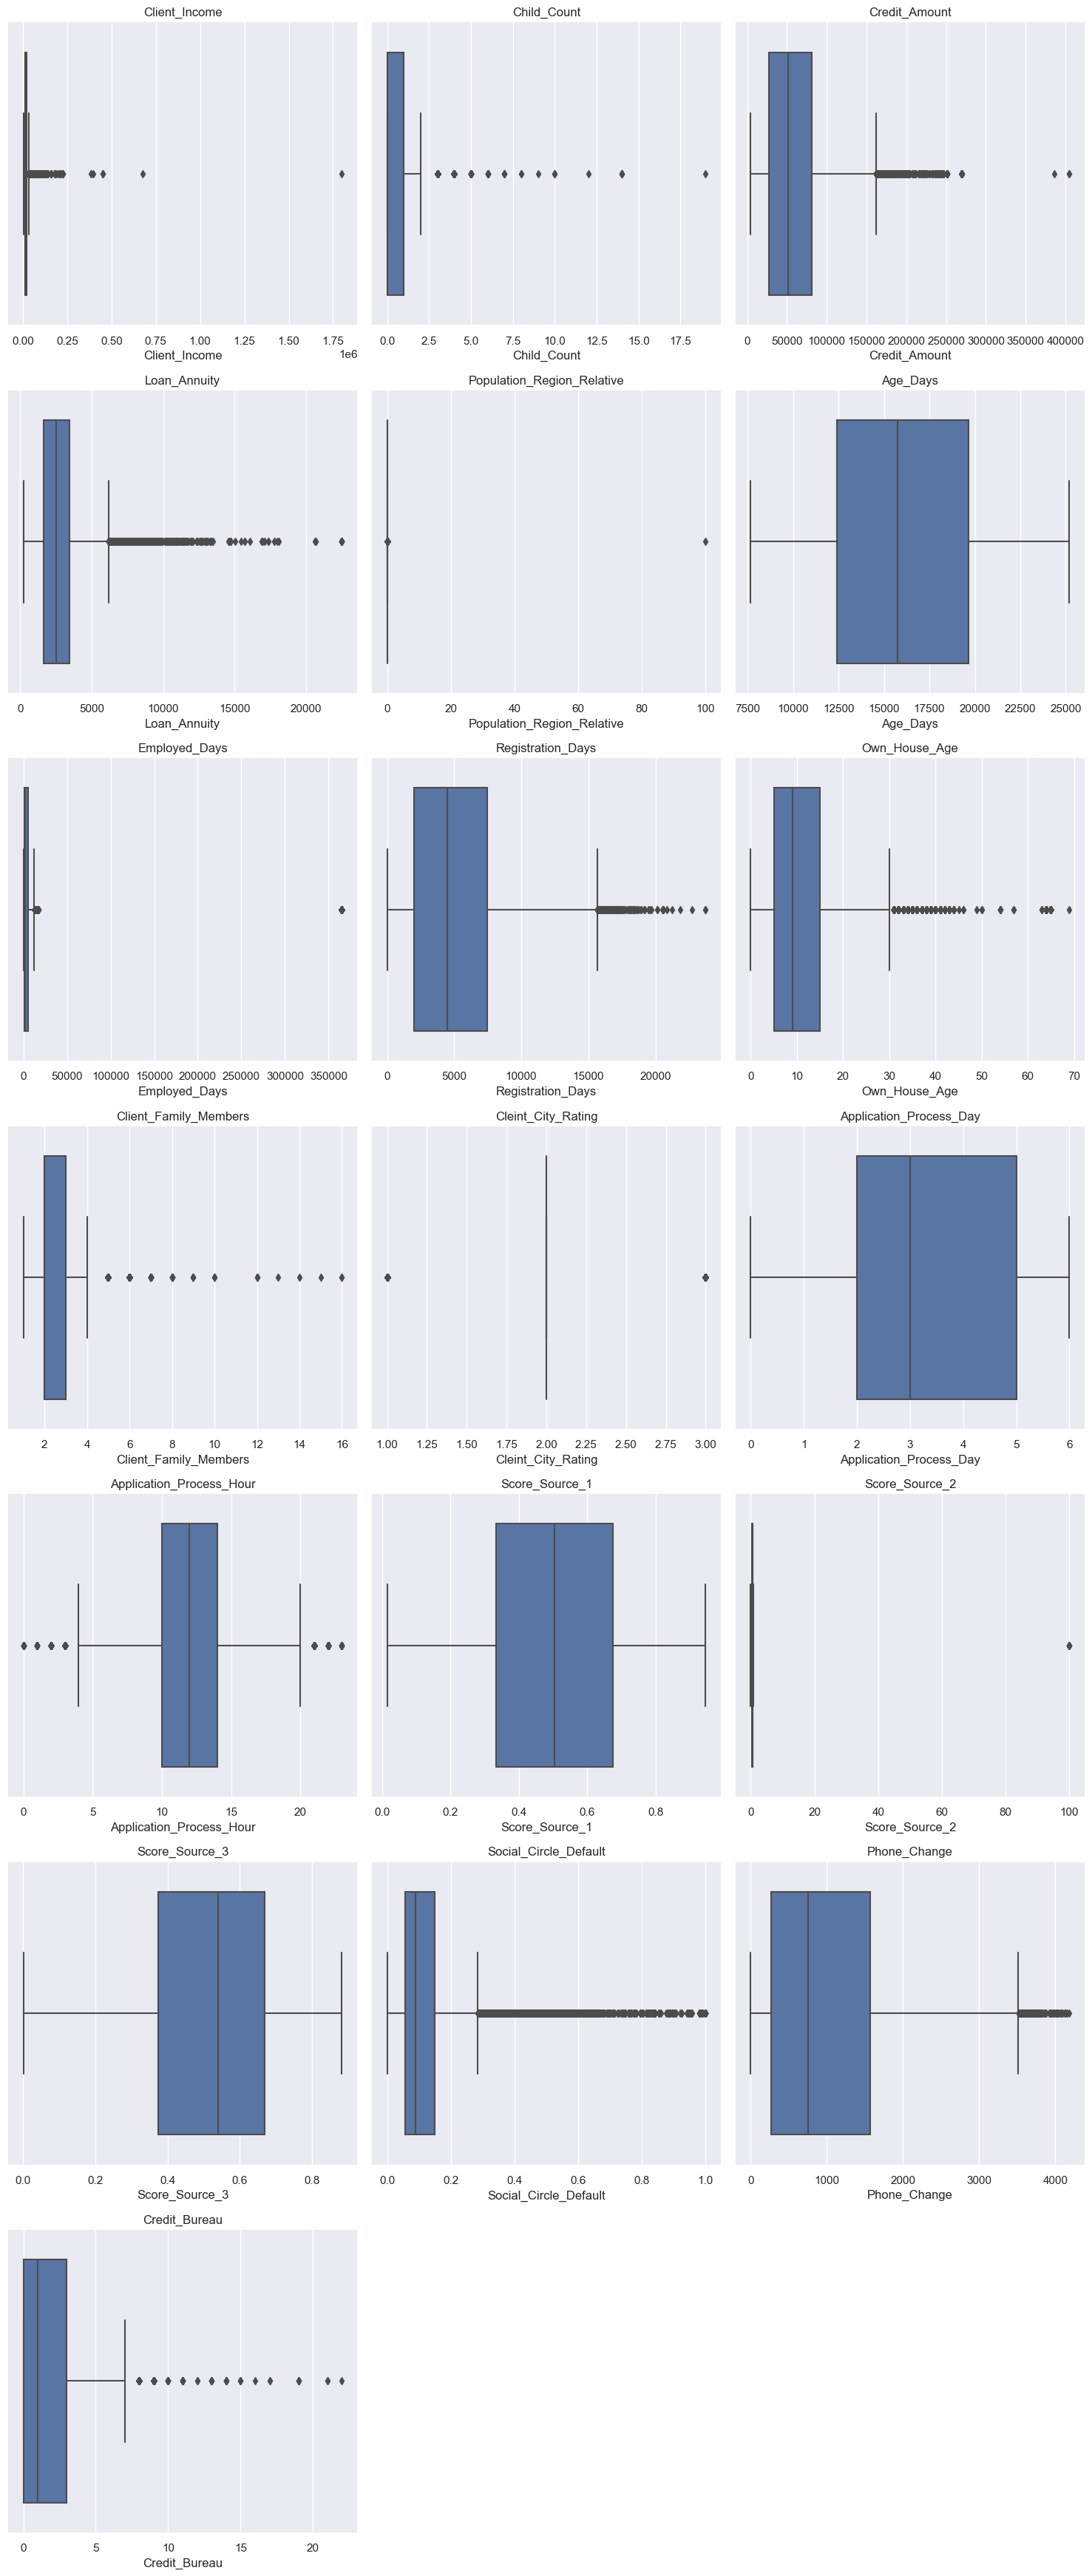

In [ ]:
# Get the names of all columns with data type 'int' or 'float', excluding the specified columns
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

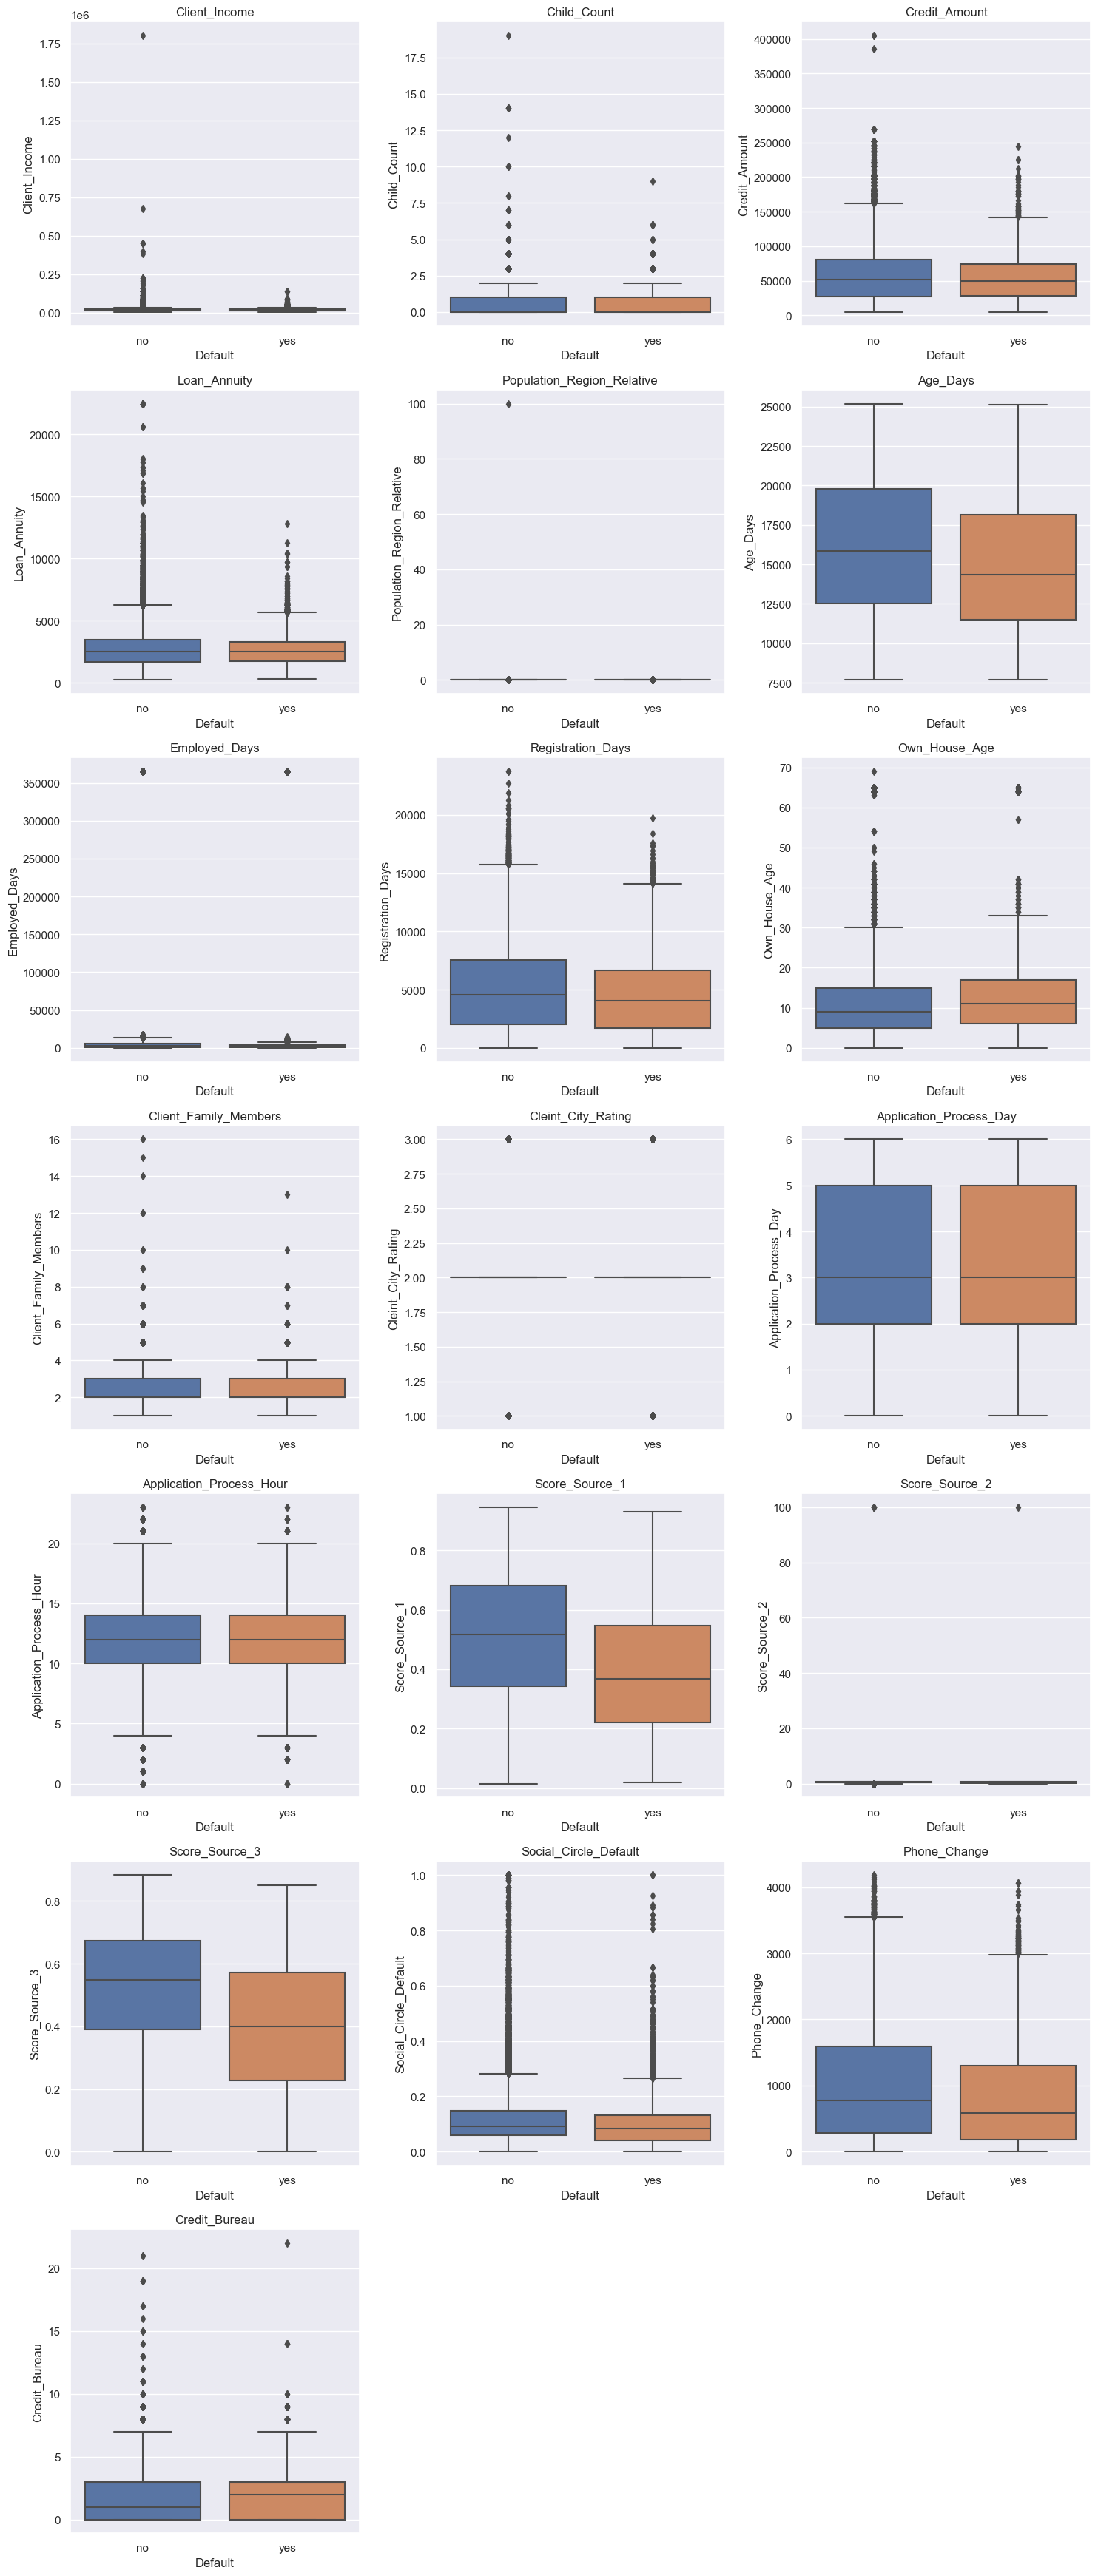

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Default', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

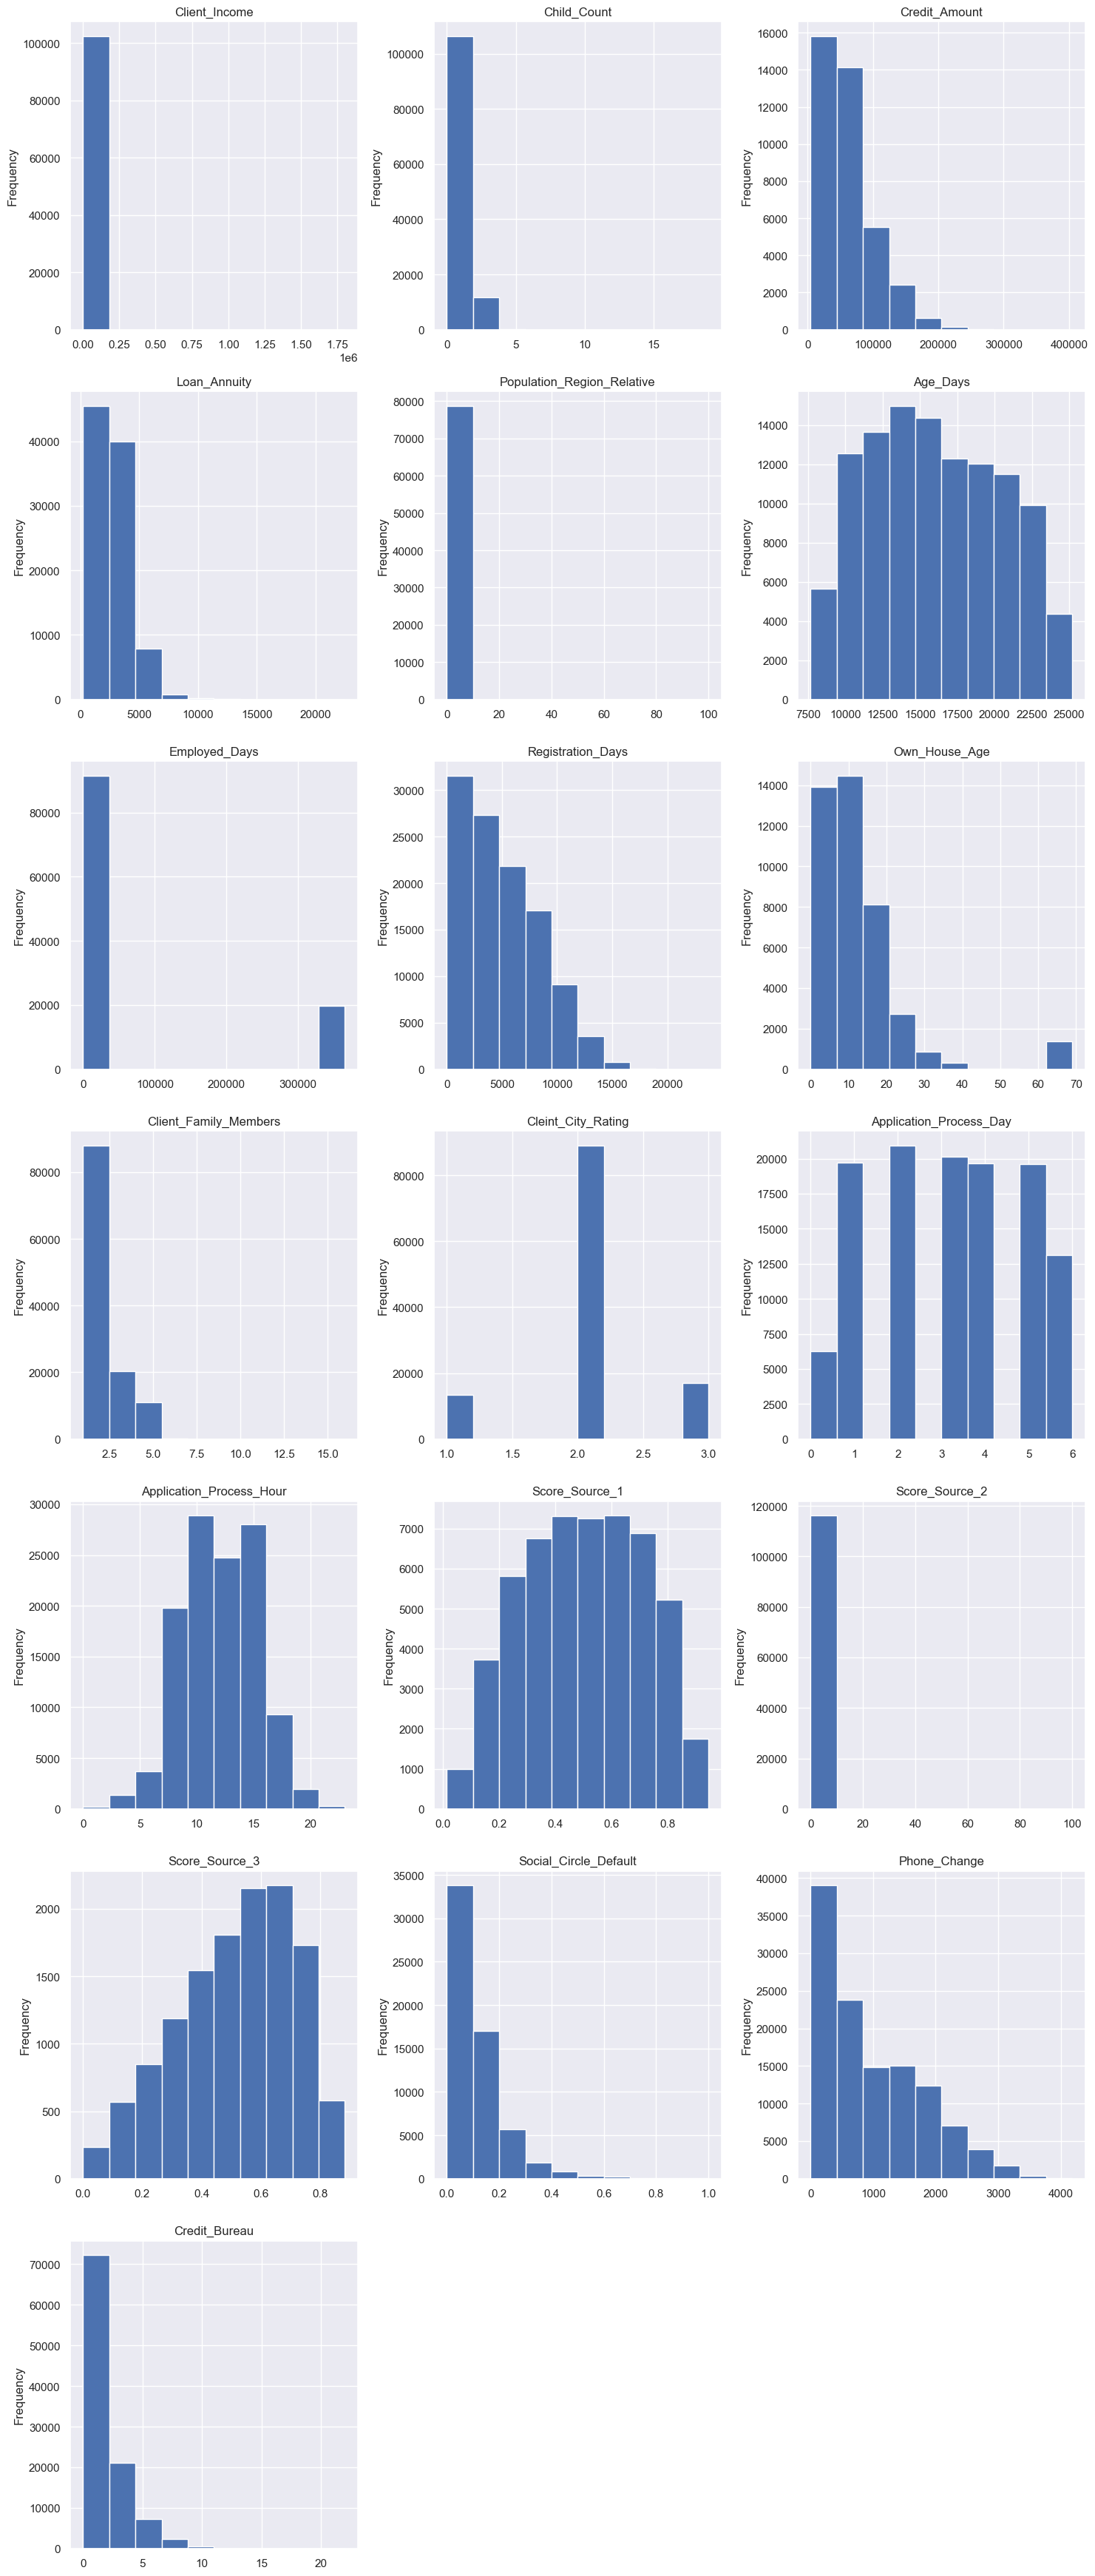

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

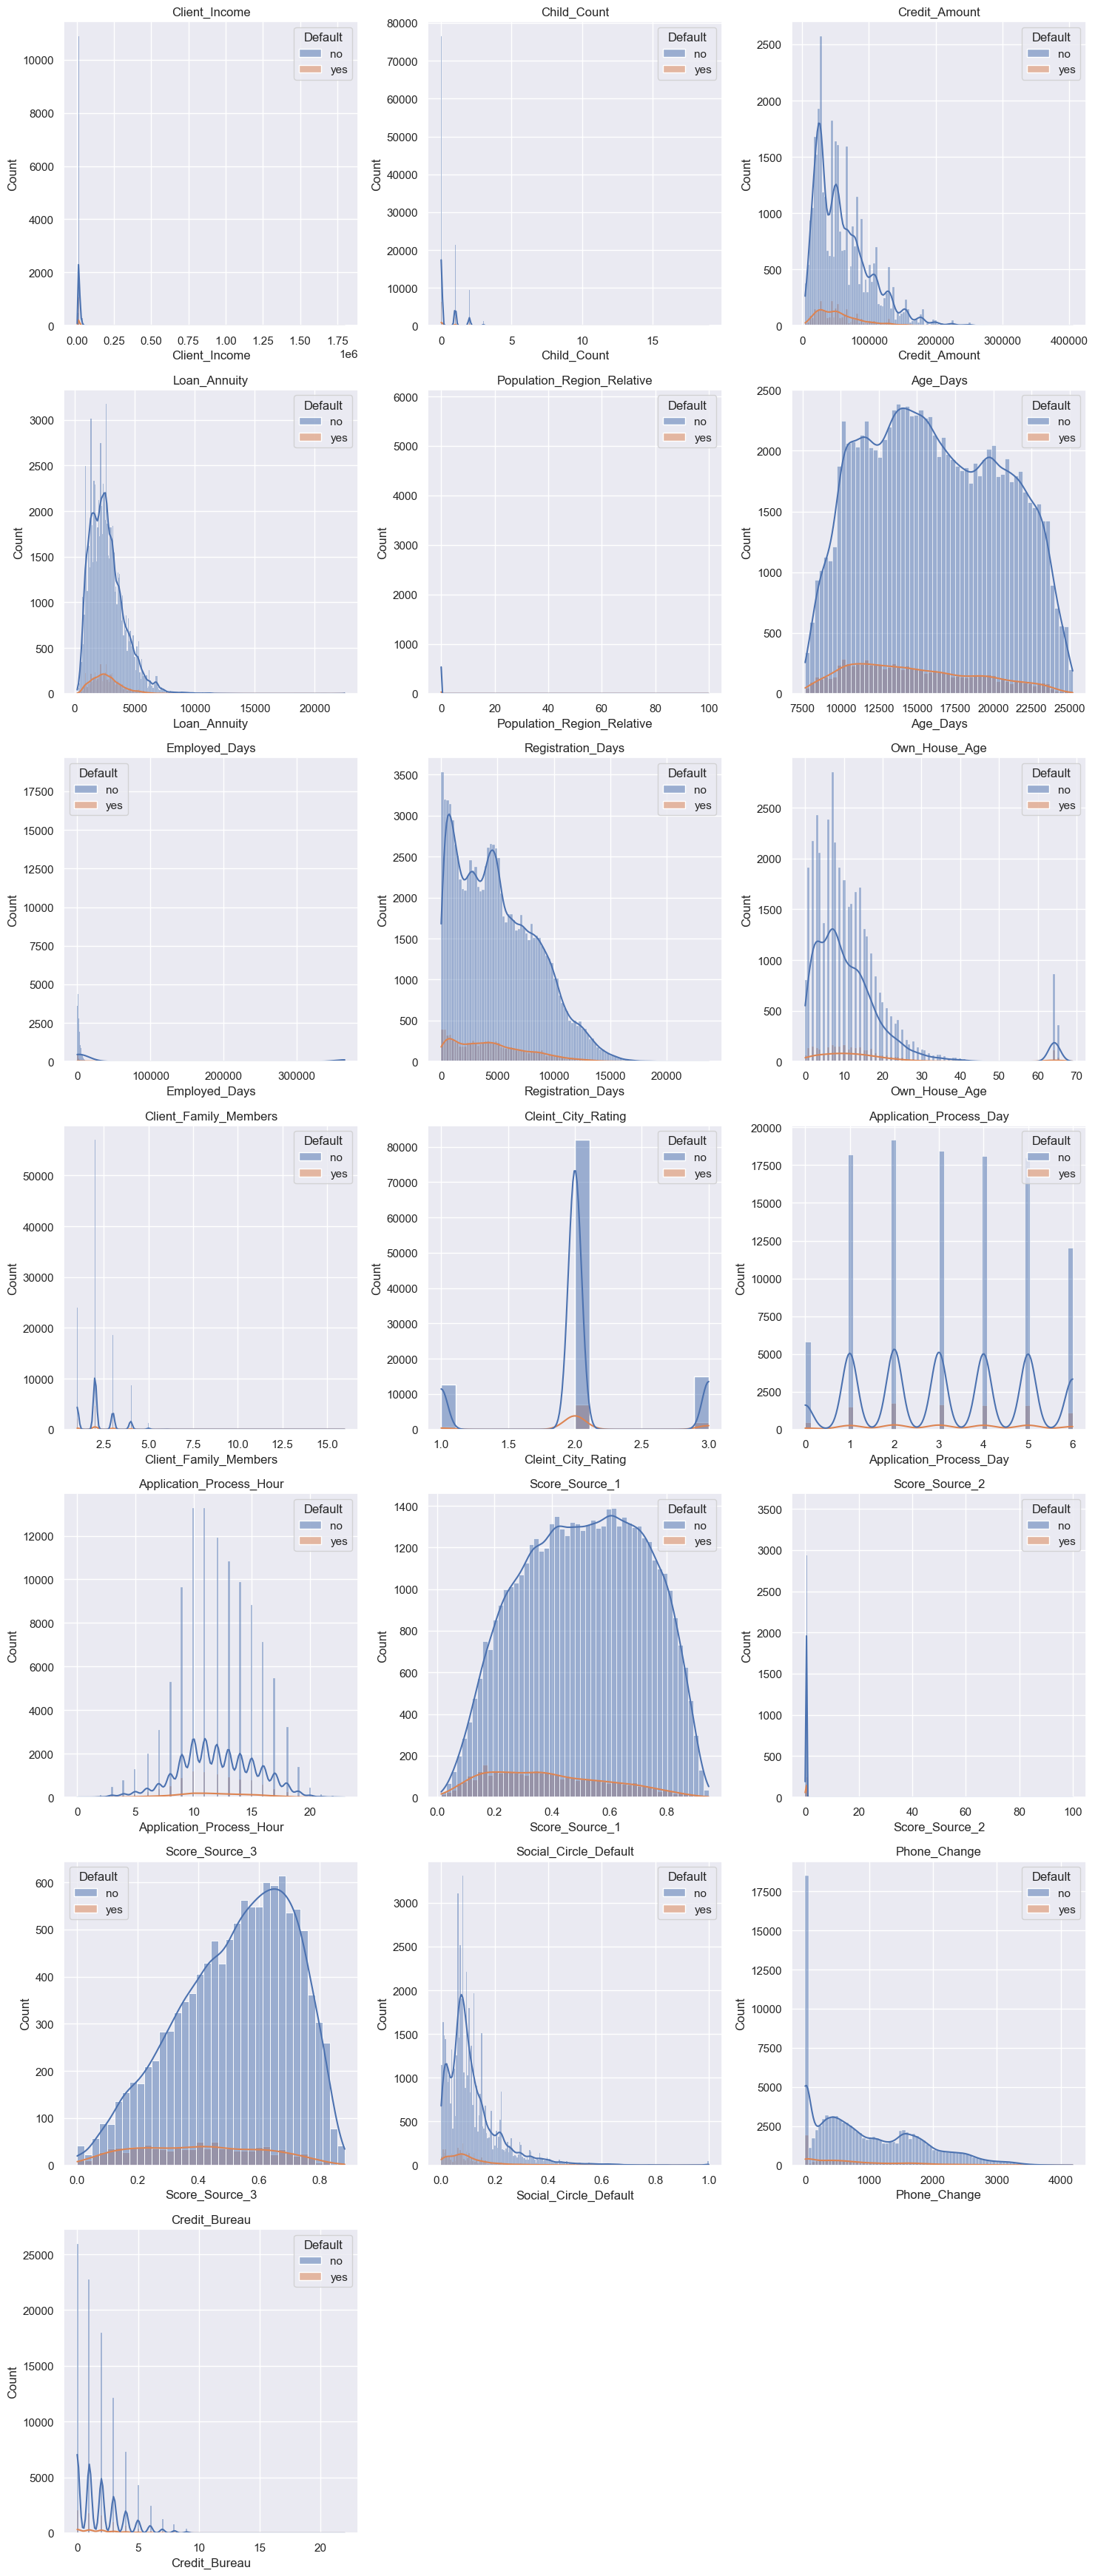

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='Default', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

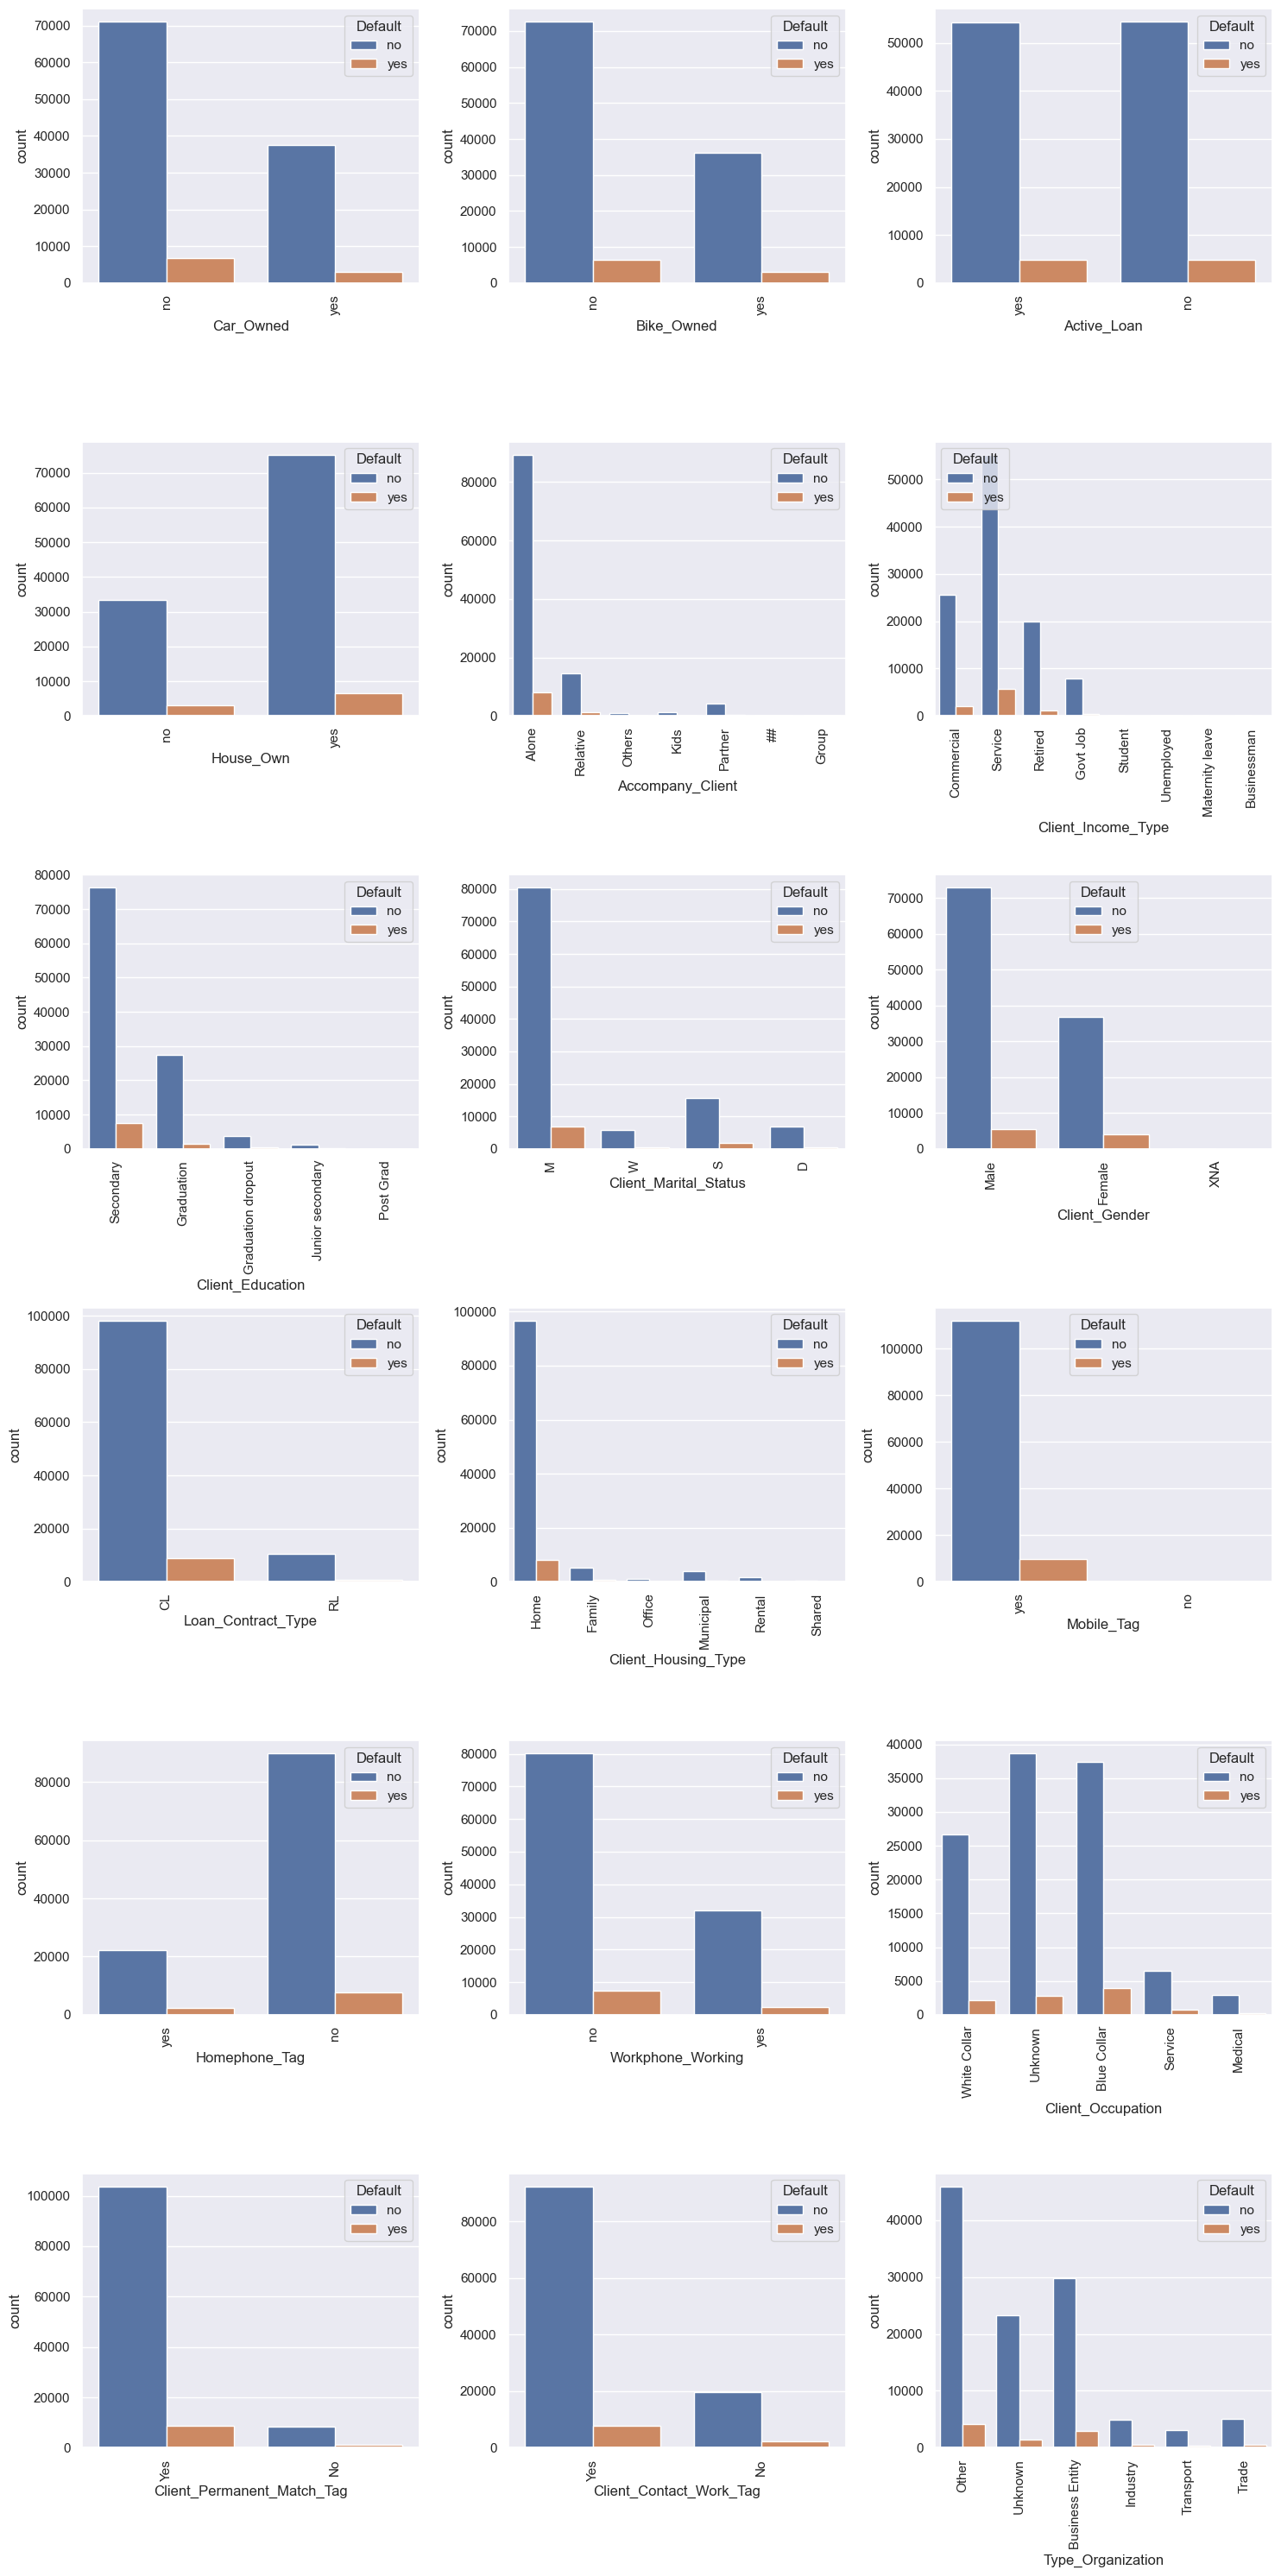

In [ ]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Country' from the list if it exists in cat_vars
if 'Default' in cat_vars:
    cat_vars.remove('Default')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Default', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

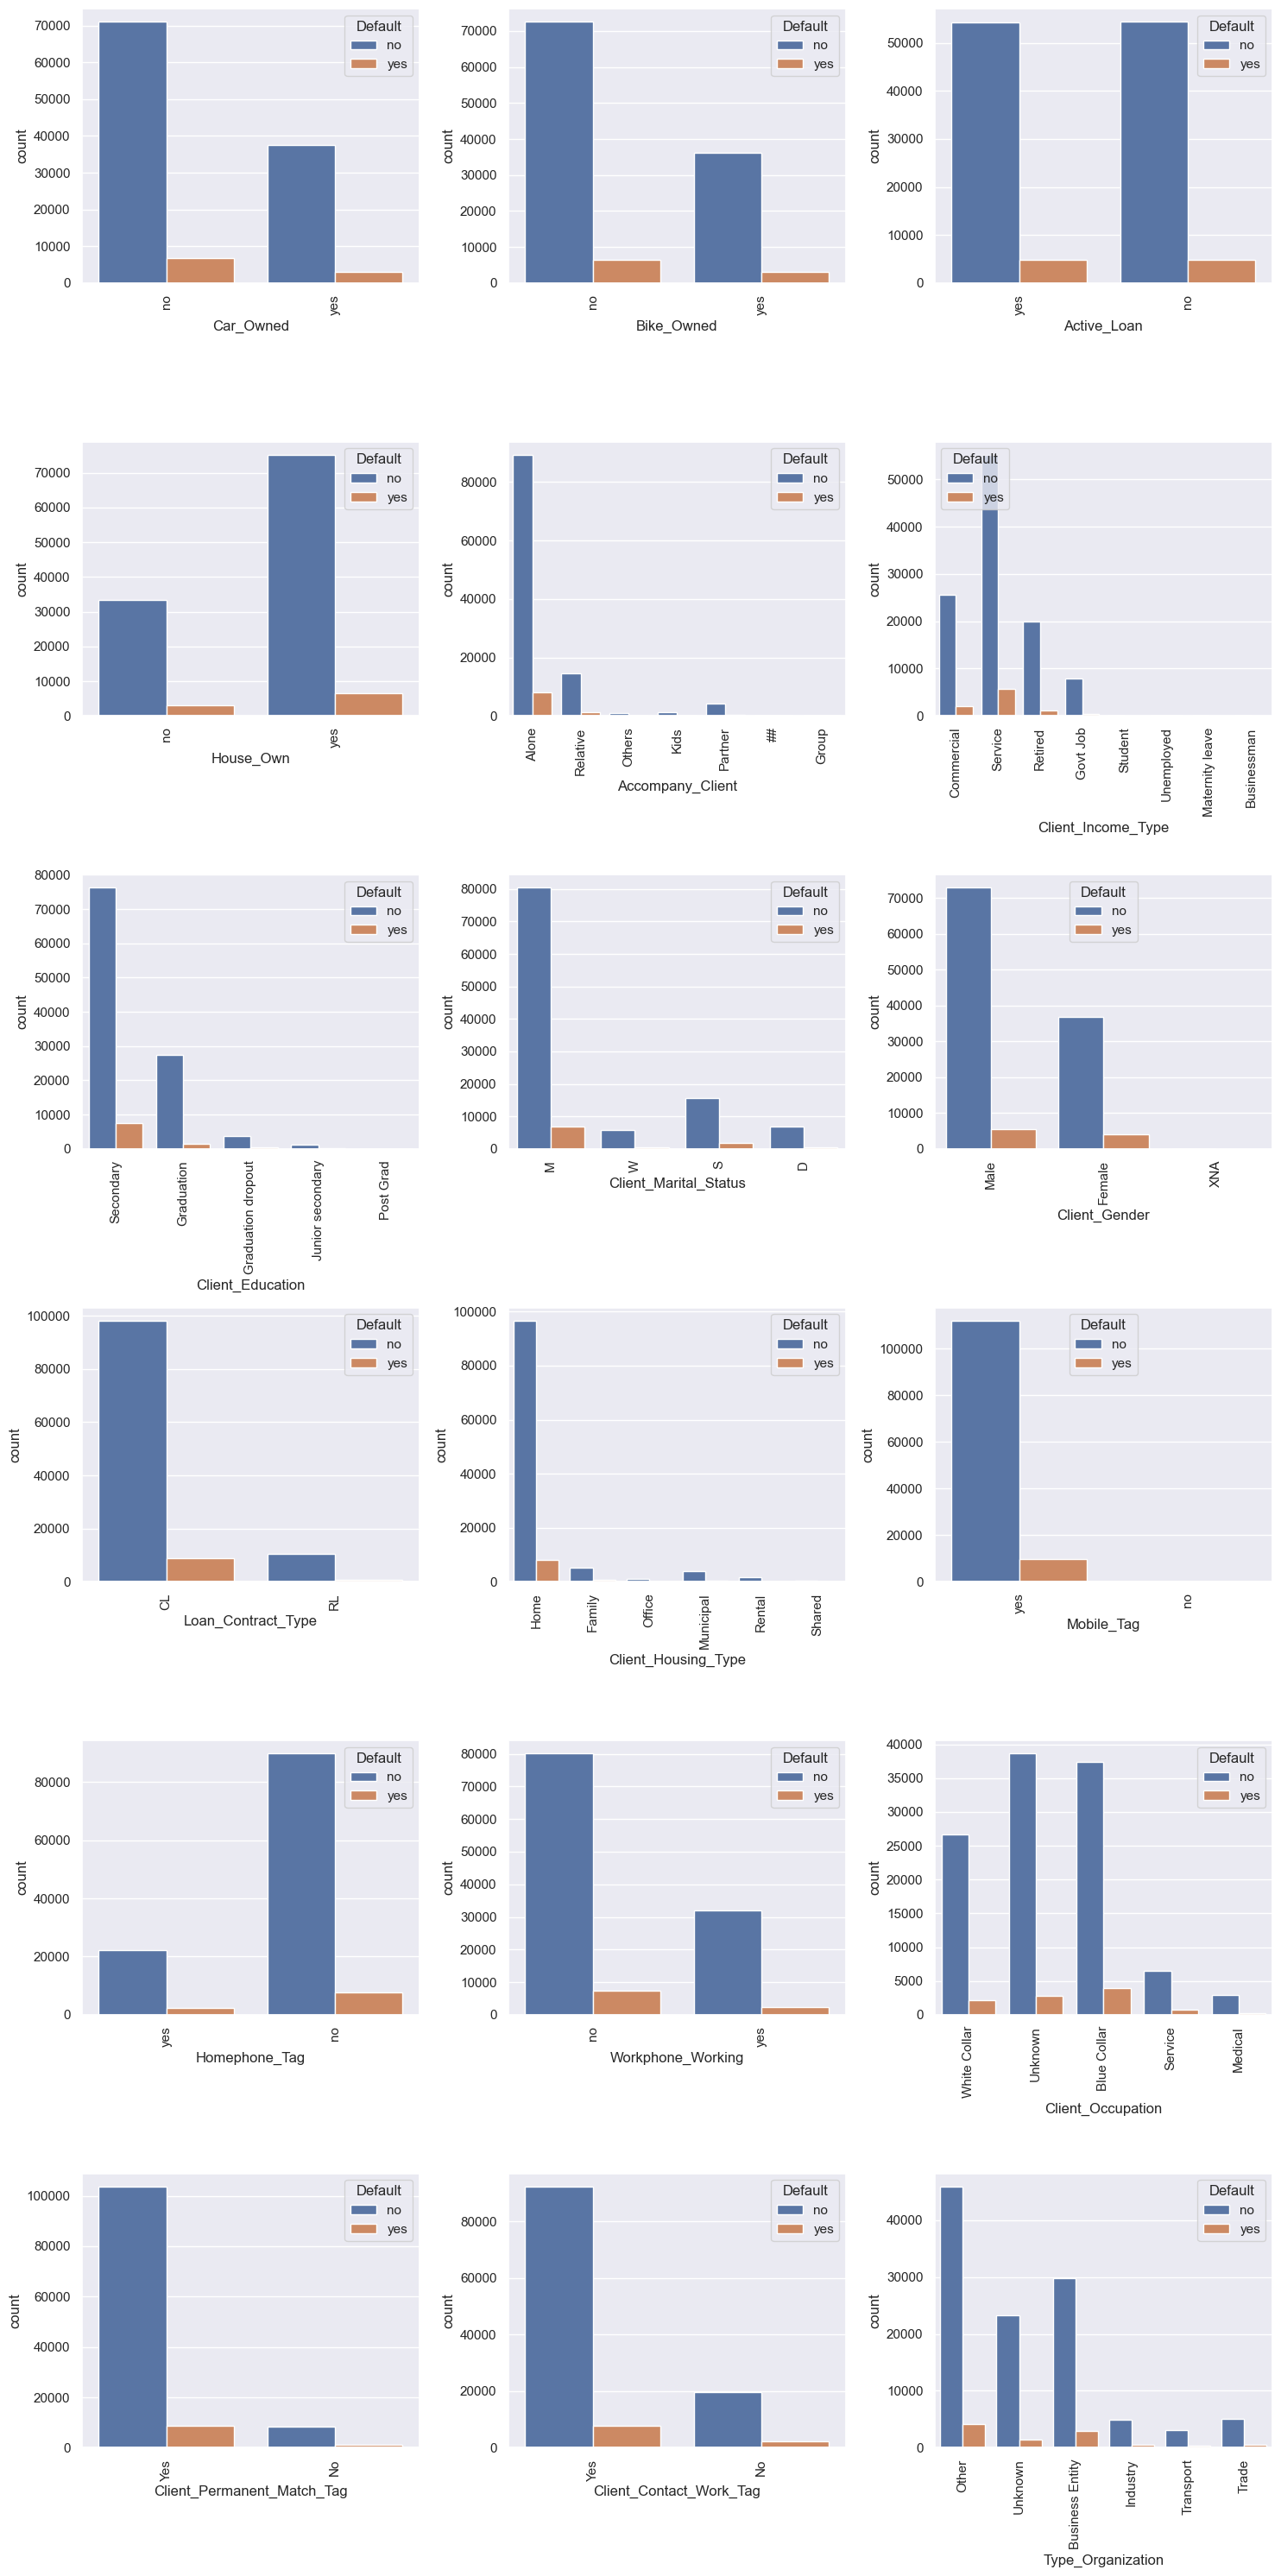

In [ ]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Country' and 'Employed' from the list if they exist in cat_vars
exclude_columns = ['Default']
cat_vars = [var for var in cat_vars if var not in exclude_columns]

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Default', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

C:\Users\Michael\AppData\Local\Temp\ipykernel_29436\3325101321.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_29436\3325101321.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_29436\3325101321.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_29436\3325101321.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_

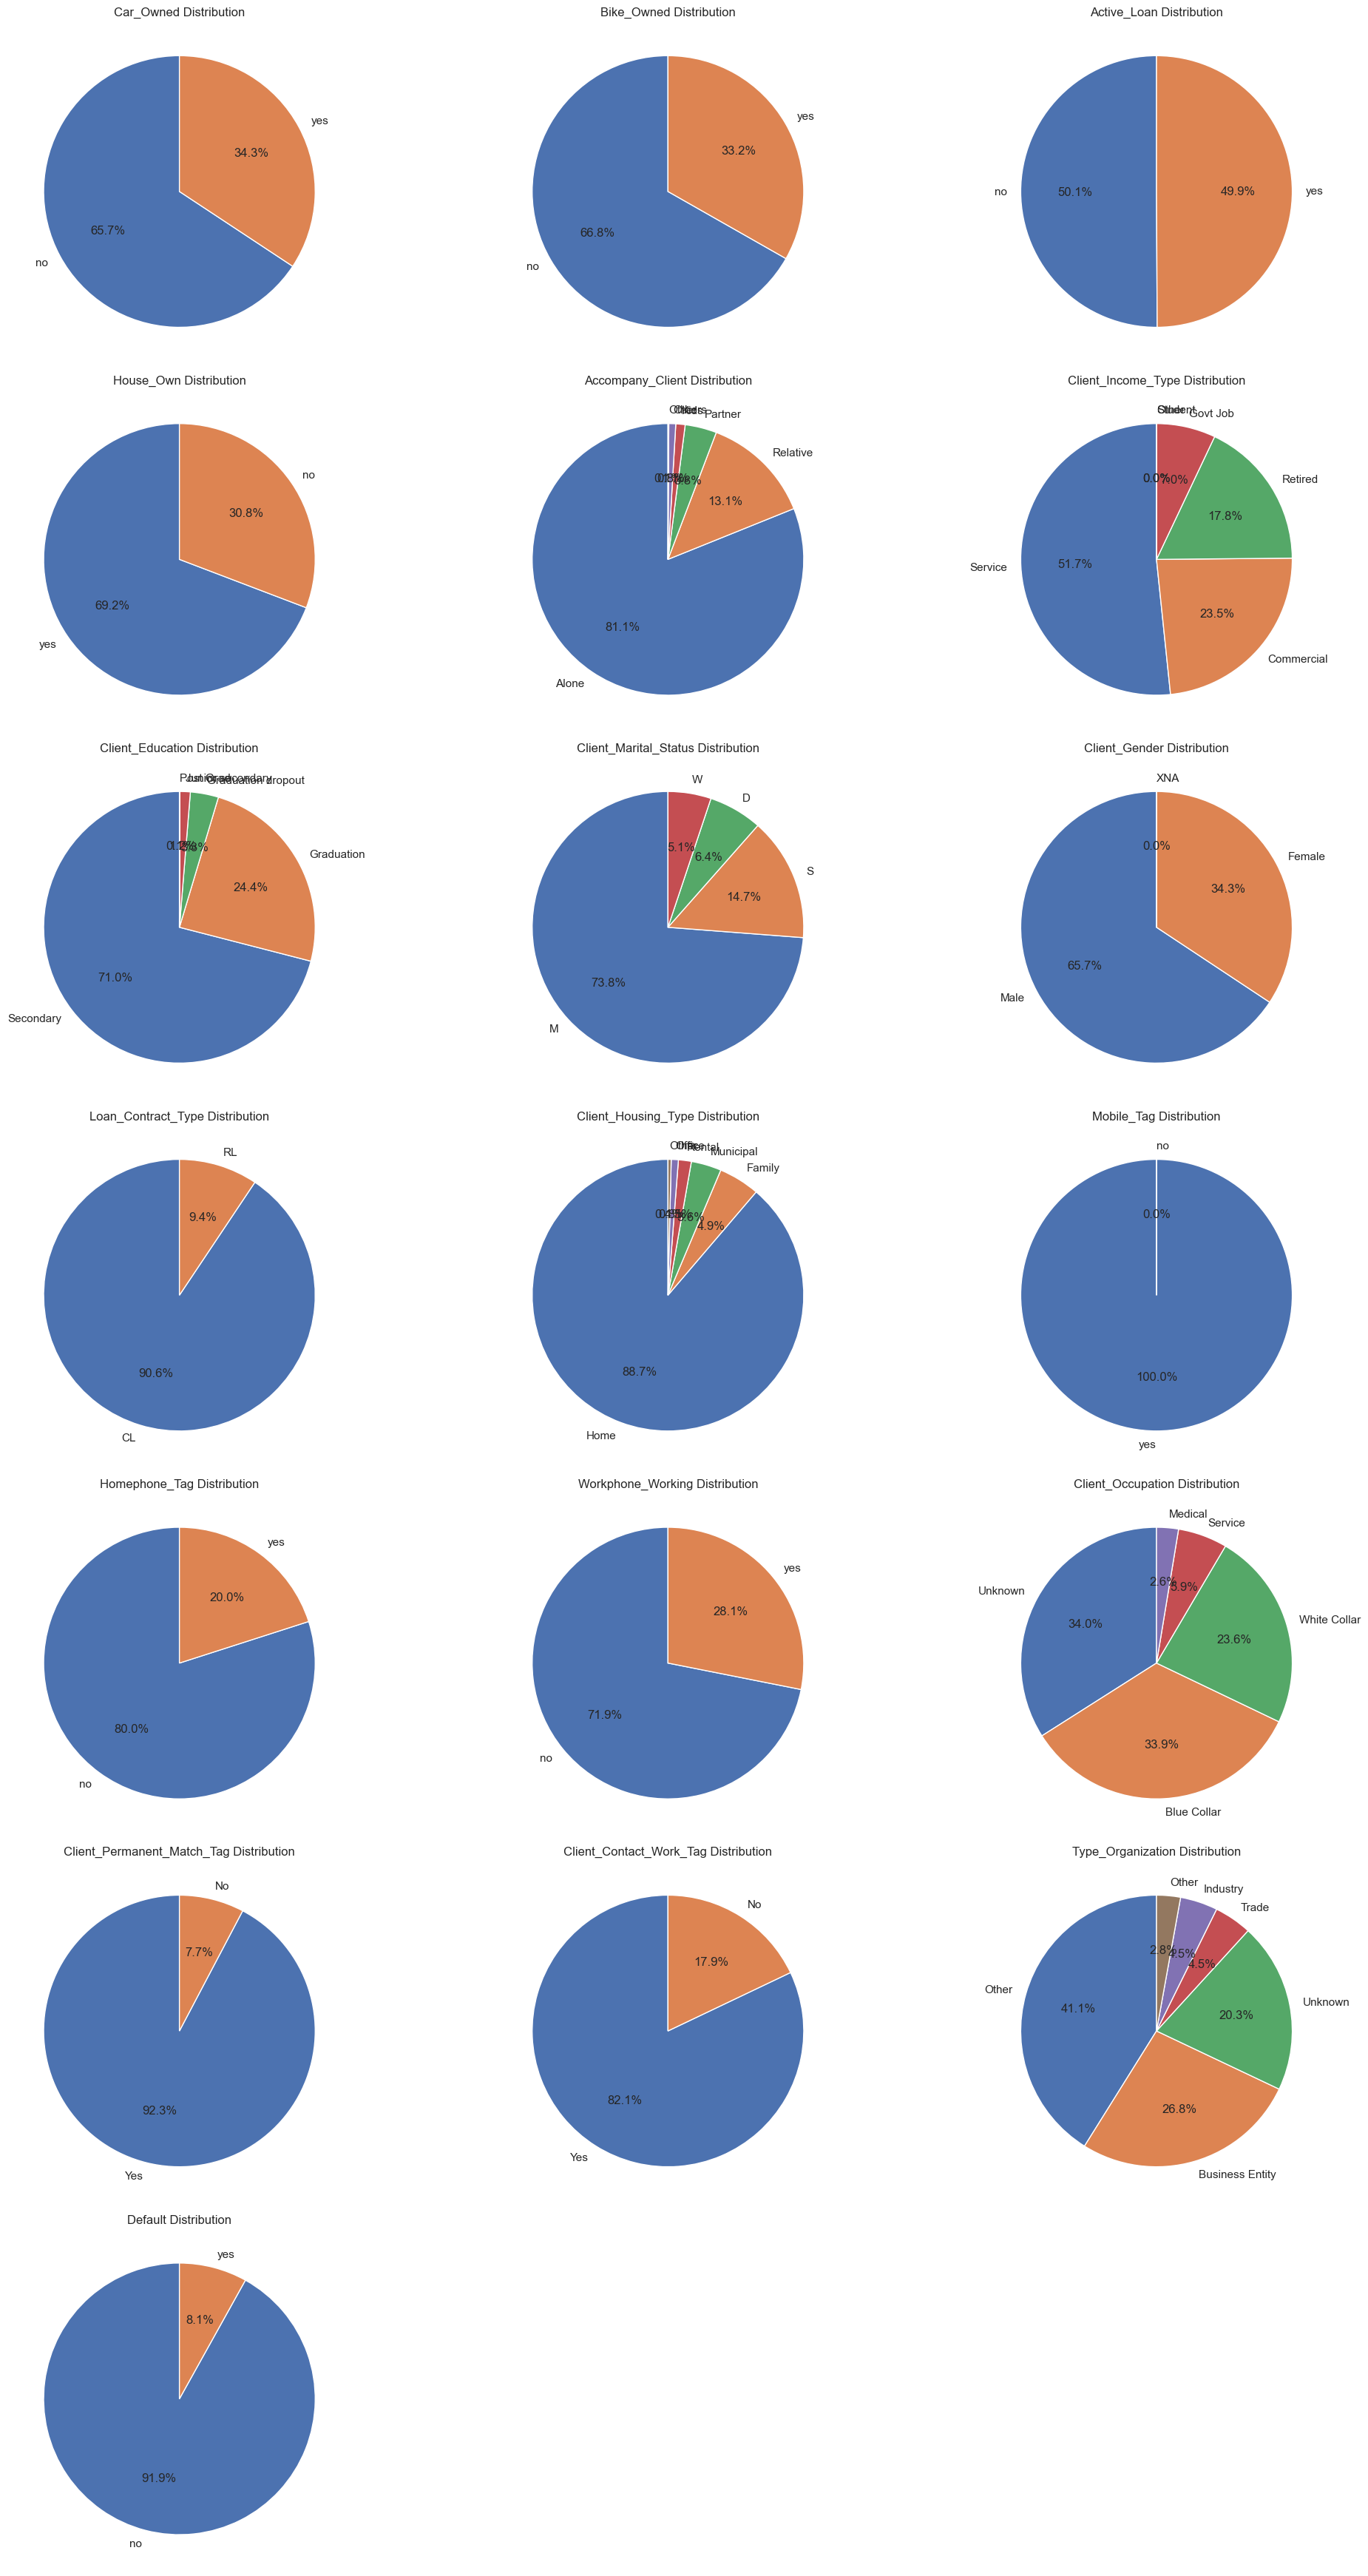

In [ ]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'Country' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# Data Preprocessing Part 2

In [ ]:
# Drop Mobile_Tag column because it only has 1 unique value
df.drop(columns = 'Mobile_Tag', inplace=True)
df.shape

(121856, 37)

In [ ]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Score_Source_3                89.477744
Credit_Amount                 68.226431
Own_House_Age                 65.729221
Score_Source_1                56.488806
Social_Circle_Default         50.820641
Population_Region_Relative    35.477121
Loan_Annuity                  22.565980
Client_Income                 16.018908
Credit_Bureau                 15.214680
Employed_Days                  8.724232
Registration_Days              8.689765
Age_Days                       8.684020
Score_Source_2                 4.666163
Client_Income_Type             3.037191
Client_Housing_Type            3.025702
Phone_Change                   3.006828
Application_Process_Hour       3.006007
House_Own                      3.004366
Loan_Contract_Type             2.996159
Client_Education               2.991236
Child_Count                    2.985491
Active_Loan                    2.983029
Bike_Owned                     2.974002
Car_Owned                      2.938715
Client_Marital_Status          2.850085


In [ ]:
# Drop column that have missing value higher than 20%, including Client_Occupation
df.drop(columns = ['Client_Occupation', 'Score_Source_3', 'Credit_Amount', 'Own_House_Age',
                   'Score_Source_1', 'Social_Circle_Default', 'Population_Region_Relative', 'Loan_Annuity'], inplace=True)
df.shape

(121856, 29)

In [ ]:
# Fill Client_Income, Employed_Days, Registration_Days, Age_Days and Credit_Bureau with median value
df['Client_Income'].fillna(df['Client_Income'].median(), inplace=True)
df['Credit_Bureau'].fillna(df['Credit_Bureau'].median(), inplace=True)
df['Employed_Days'].fillna(df['Employed_Days'].median(), inplace=True)
df['Registration_Days'].fillna(df['Registration_Days'].median(), inplace=True)
df['Age_Days'].fillna(df['Age_Days'].median(), inplace=True)

In [ ]:
# Drop all of the null value for the rest of column
df.dropna(inplace=True)
df.shape

(73550, 29)

# Label Encoding for Object Datatypes

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Car_Owned: ['no' 'yes']
Bike_Owned: ['no' 'yes']
Active_Loan: ['yes' 'no']
House_Own: ['no' 'yes']
Accompany_Client: ['Alone' 'Relative' 'Others' 'Kids' 'Partner' 'Group' '##']
Client_Income_Type: ['Commercial' 'Retired' 'Service' 'Govt Job' 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Client_Education: ['Secondary' 'Graduation' 'Graduation dropout' 'Junior secondary'
 'Post Grad']
Client_Marital_Status: ['M' 'W' 'S' 'D']
Client_Gender: ['Male' 'Female' 'XNA']
Loan_Contract_Type: ['CL' 'RL']
Client_Housing_Type: ['Home' 'Family' 'Office' 'Municipal' 'Rental' 'Shared']
Homephone_Tag: ['yes' 'no']
Workphone_Working: ['no' 'yes']
Client_Permanent_Match_Tag: ['Yes' 'No']
Client_Contact_Work_Tag: ['Yes' 'No']
Type_Organization: ['Other' 'Unknown' 'Business Entity' 'Industry' 'Trade' 'Transport']
Default: ['no' 'yes']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Car_Owned: [0 1]
Bike_Owned: [0 1]
Active_Loan: [1 0]
House_Own: [0 1]
Accompany_Client: [1 6 4 3 5 2 0]
Client_Income_Type: [1 4 5 2 6 7 3 0]
Client_Education: [4 0 1 2 3]
Client_Marital_Status: [1 3 2 0]
Client_Gender: [1 0 2]
Loan_Contract_Type: [0 1]
Client_Housing_Type: [1 0 3 2 4 5]
Homephone_Tag: [1 0]
Workphone_Working: [0 1]
Client_Permanent_Match_Tag: [1 0]
Client_Contact_Work_Tag: [1 0]
Type_Organization: [2 5 0 1 3 4]
Default: [0 1]


<AxesSubplot:>

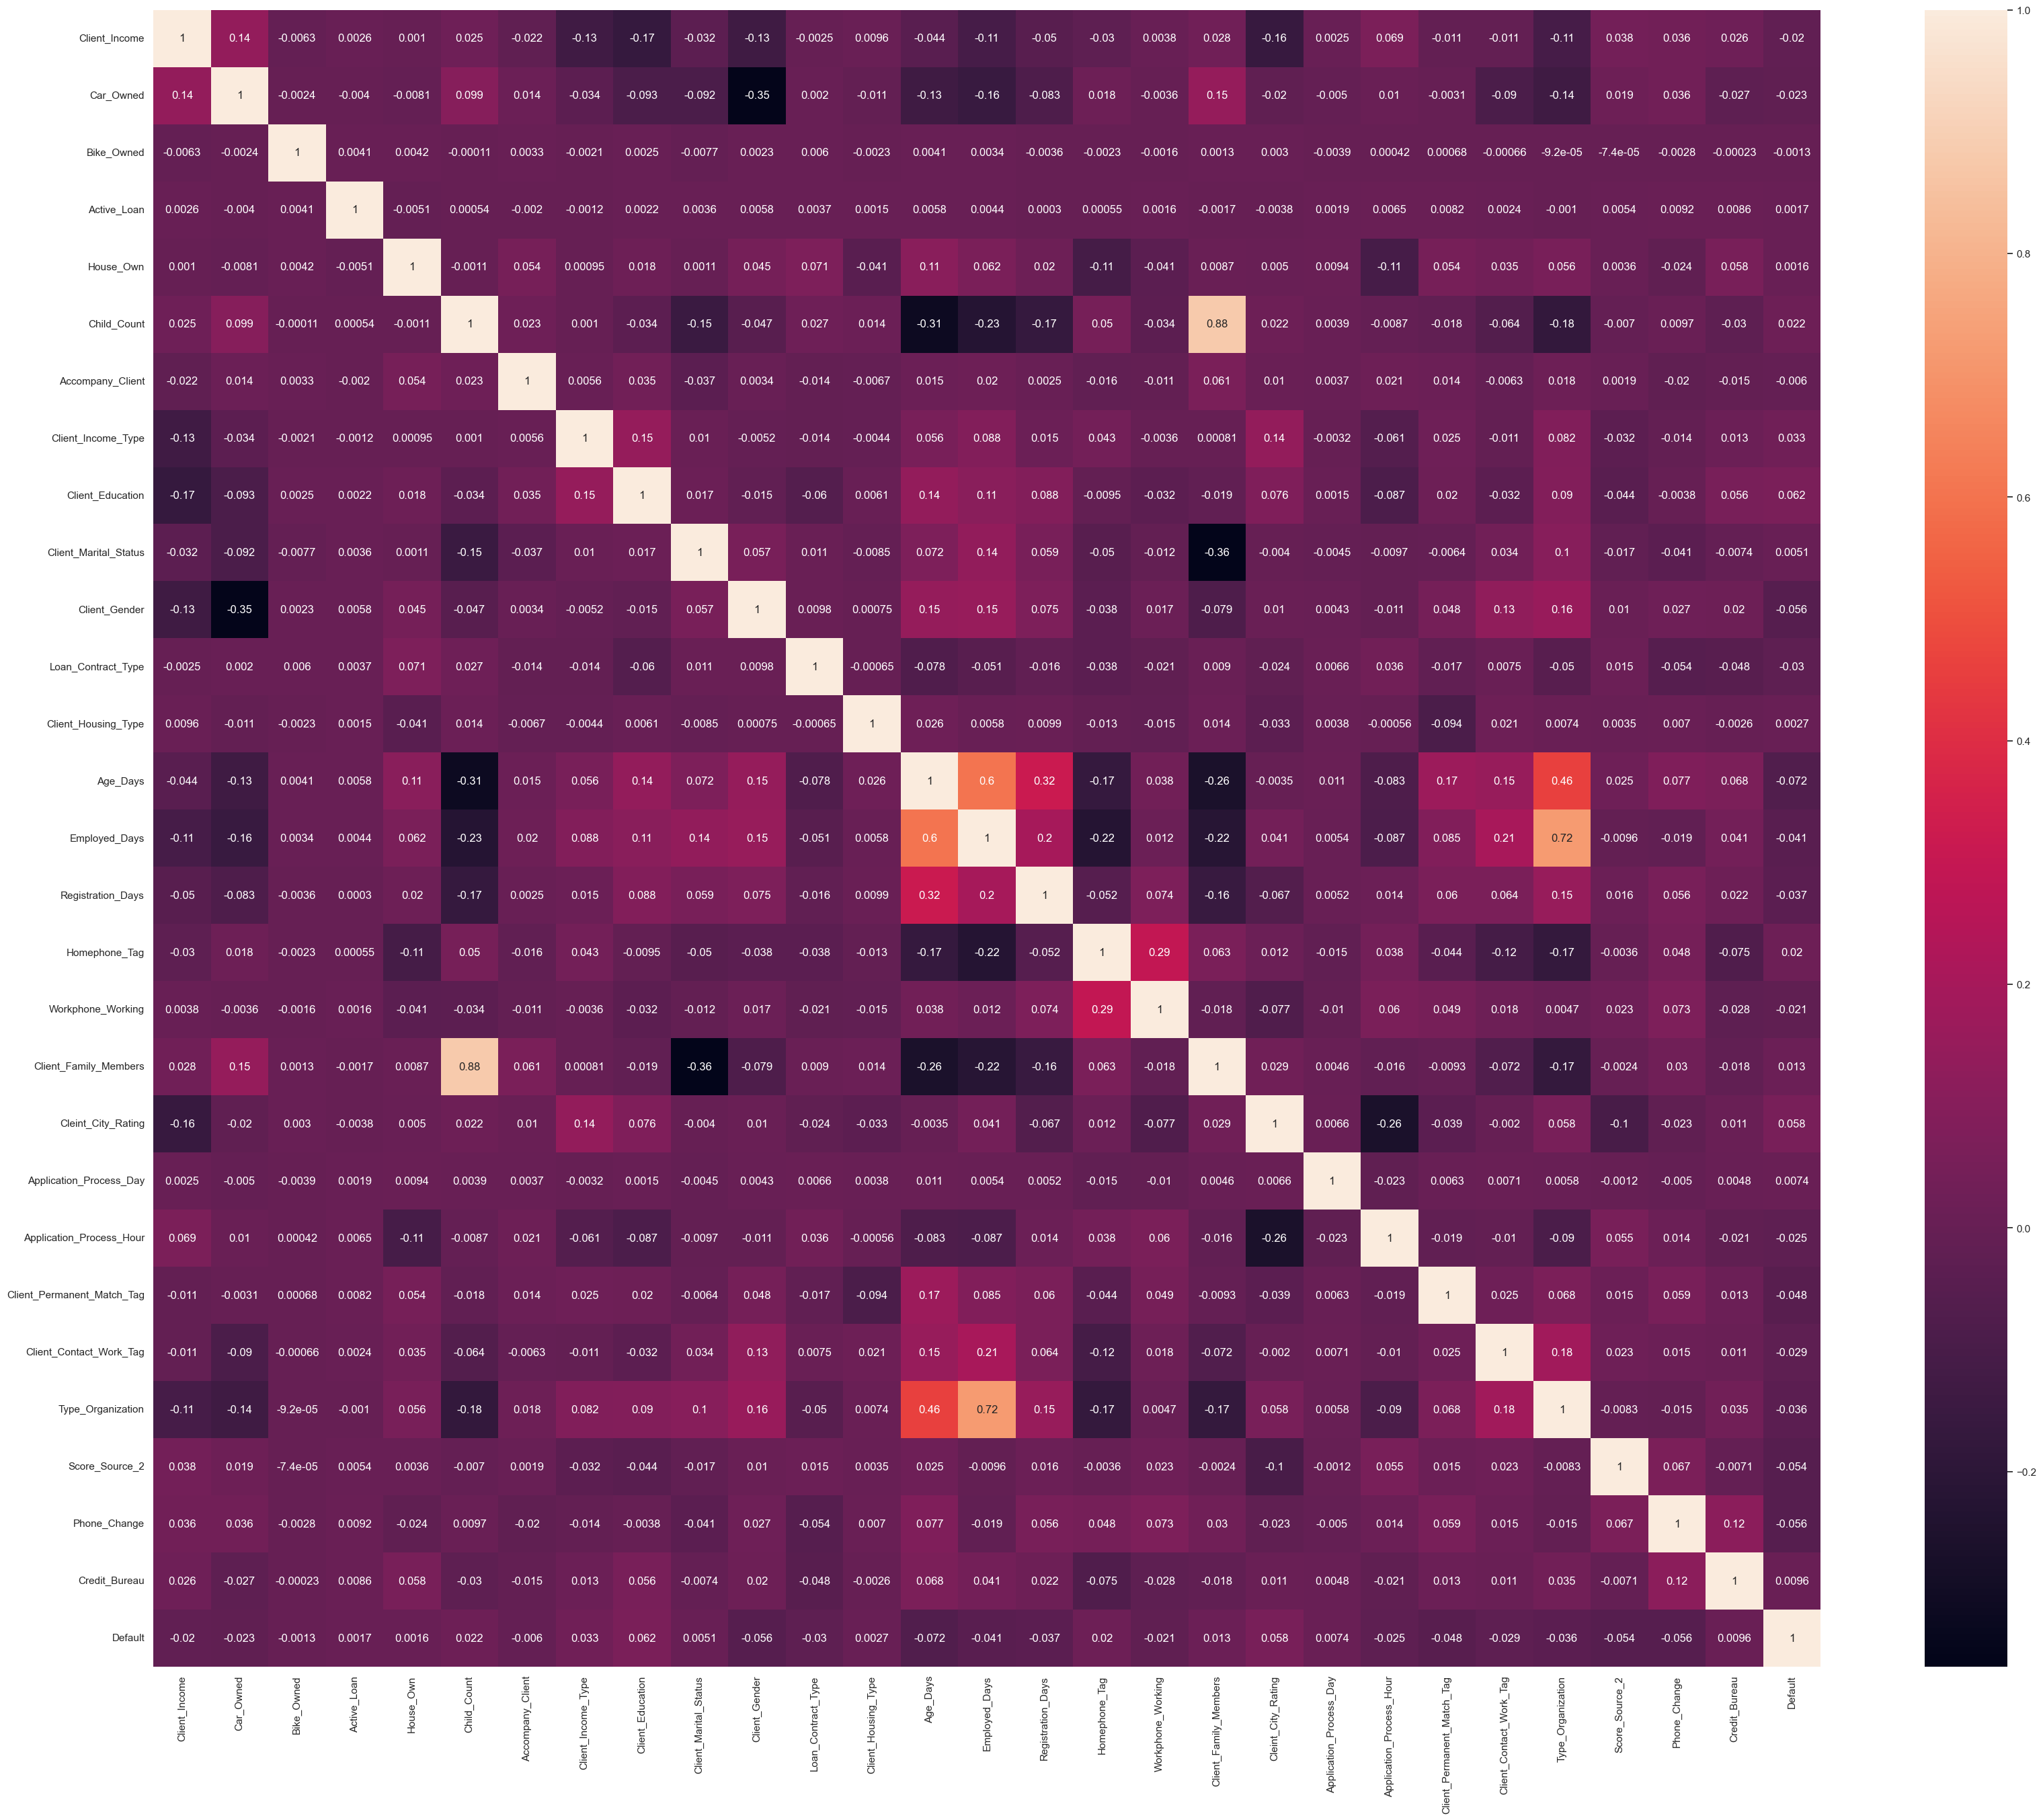

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [ ]:
# Drop Child_Count column because it have high correlation with Client_Family_Members
df.drop(columns = 'Child_Count', inplace=True)
df.shape

(73550, 28)

In [ ]:
df.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0         6750.0          0           0            1          0   
3        15750.0          0           0            1          1   
5        11250.0          0           1            1          1   
6        15750.0          1           1            0          1   
7        13500.0          0           0            1          1   

   Accompany_Client  Client_Income_Type  Client_Education  \
0                 1                   1                 4   
3                 1                   4                 4   
5                 1                   5                 4   
6                 1                   4                 4   
7                 1                   4                 4   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0                      1              1                   0   
3                      1              1                   0   
5                      3              0                   0   
6                      2              1                   0   
7                      1              1                   0   

   Client_Housing_Type  Age_Days  Employed_Days  Registration_Days  \
0                    1   13957.0         1062.0             6123.0   
3                    1   23195.0       365243.0             4496.0   
5                    1   13881.0         1184.0             3910.0   
6                    1   21323.0       365243.0              113.0   
7                    1   22493.0       365243.0            12617.0   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0              1                  0                    2.0   
3              0                  0                    2.0   
5              0                  0                    2.0   
6              0                  0                    1.0   
7              0                  1                    2.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
3                 3.0                      2.0                      15.0   
5                 2.0                      2.0                      10.0   
6                 2.0                      3.0                      14.0   
7                 2.0                      4.0                      15.0   

   Client_Permanent_Match_Tag  Client_Contact_Work_Tag  Type_Organization  \
0                           1                        1                  2   
3                           1                        1                  5   
5                           1                        1                  2   
6                           1                        1                  5   
7                           1                        1                  5   

   Score_Source_2  Phone_Change  Credit_Bureau  Default  
0        0.478787          63.0            1.0        0  
3        0.135182        1700.0            3.0        0  
5        0.697928         739.0            0.0        0  
6        0.602545           0.0            3.0        0  
7        0.657508        1687.0            4.0        0

# Train Test Split

In [ ]:
X = df.drop('Default', axis=1)
y = df['Default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Remove Outlier from Train Data using Z-Score

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Client_Income', 'Employed_Days', 'Registration_Days',
                    'Client_Family_Members', 'Application_Process_Hour', 'Score_Source_2',
                    'Phone_Change','Credit_Bureau']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=9, min_samples_leaf=2, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 61.3 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6129843643779742
Precision Score :  0.6129843643779742
Recall Score :  0.6129843643779742
Jaccard Score :  0.44194481203744546
Log Loss :  13.36733046316804


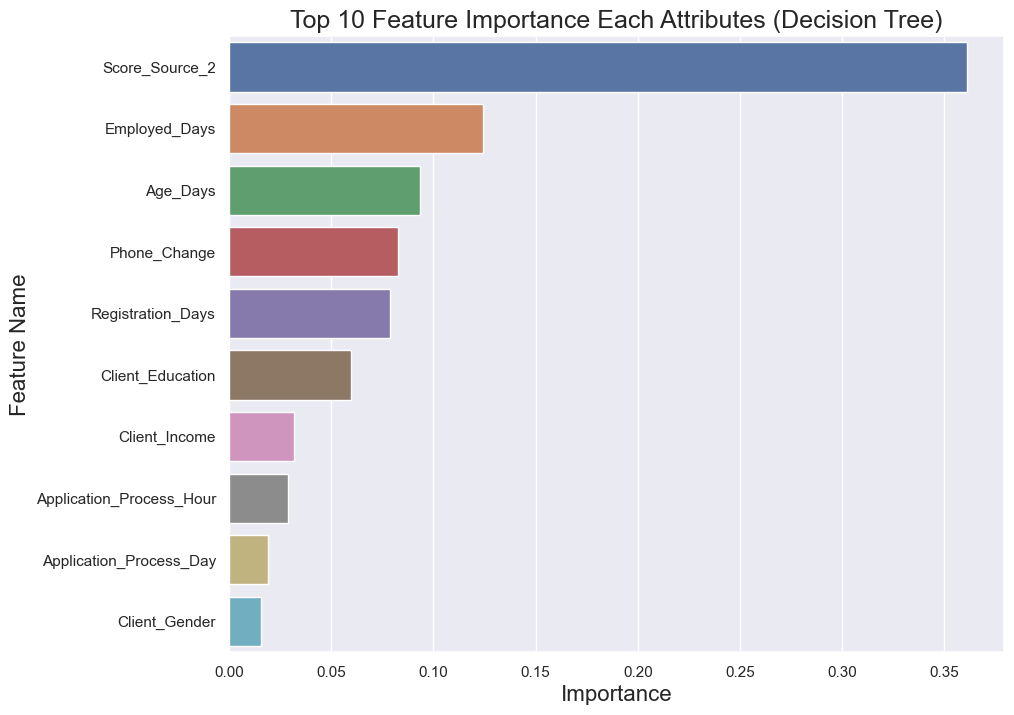

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


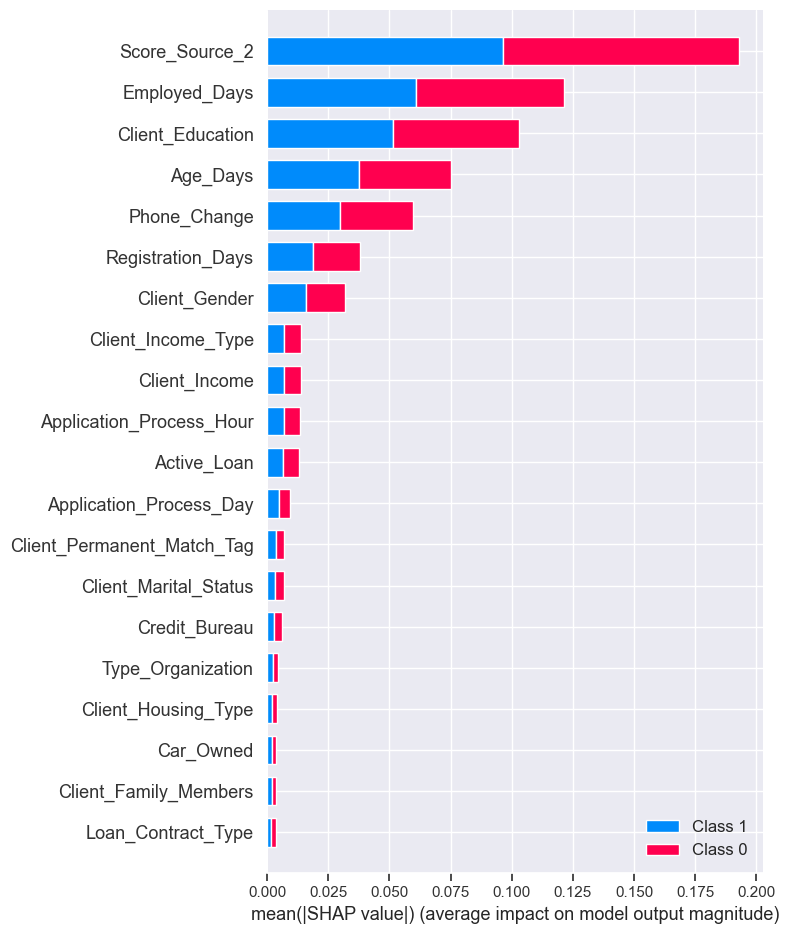

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

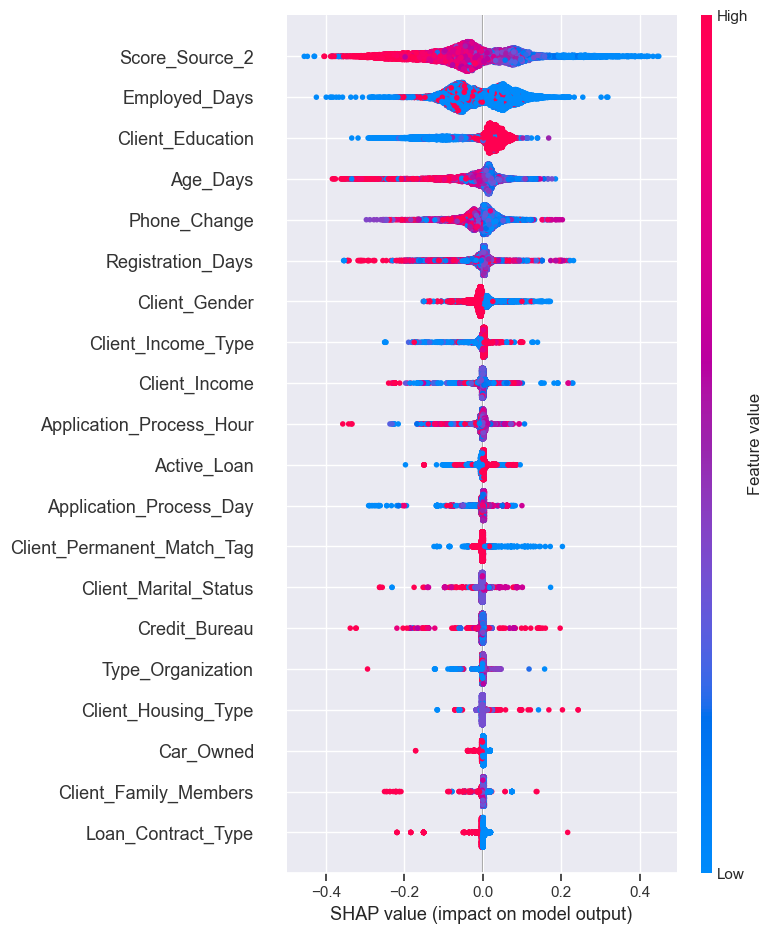

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6129843643779742')

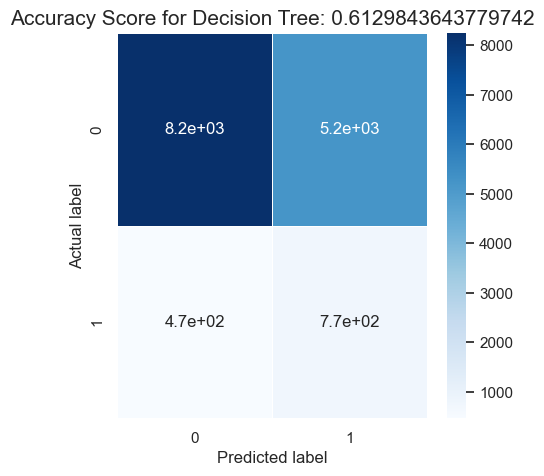

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

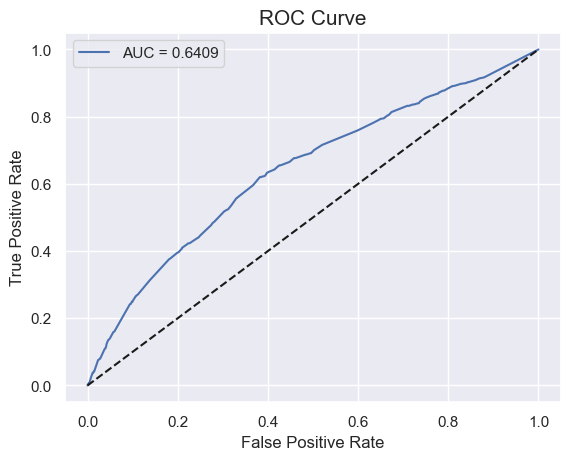

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=None, max_features=None, n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 92.09 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9208701563562203
Precision Score :  0.9208701563562203
Recall Score :  0.9208701563562203
Jaccard Score :  0.8533450926042585
Log Loss :  2.73304835627859


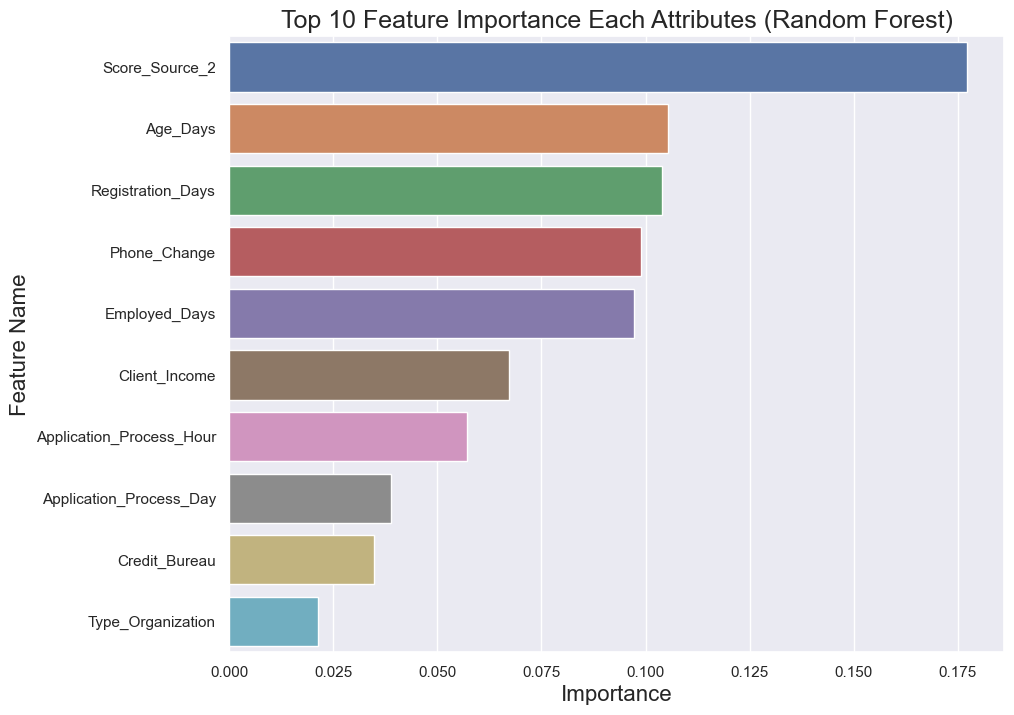

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()